# Import libraries needed

In [492]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)

import warnings
warnings.filterwarnings('ignore')

# Data

## Loading data and getting the shape

In [493]:
data = pd.read_csv('nutrition.csv')
data.shape

(8789, 77)

**The dataset has 8789 rows and 77 columns.**

In [494]:
data.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,lucopene,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,hydroxyproline,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,0.000 mg,0.000 mg,0.000 mg,0.000 mg,0.00 IU,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0,0.00 mcg,0.000 mg,0.0 mg,0.00 IU,0.00 mg,0.00 mg,0.0 mcg,2.00 mg,0.050 mg,0.47 mg,3.00 mg,0.053 mg,13.00 mg,3.00 mg,2.8 mcg,0.06 mg,0.26 g,0.019 g,0.012 g,0.020 g,0.006 g,0.053 g,0.009 g,0.008 g,0,0.010 g,0.036 g,0.006 g,0.006 g,0.013 g,0.024 g,0.012 g,0.009 g,0.001 g,0.010 g,0.014 g,91.27 g,0.9 g,0.00 g,0,0,0,0,0,0,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,0.863 mg,0.130 mg,0.660 mg,56.00 IU,3.00 mcg,0.00 mcg,29.00 mcg,9.00 mcg,17.00 mcg,0,0.00 mcg,0.210 mg,1.1 mg,0.00 IU,1.40 mg,1.40 mg,3.5 mcg,70.00 mg,1.200 mg,2.53 mg,121.00 mg,4.500 mg,277.00 mg,410.00 mg,3.8 mcg,4.53 mg,9.17 g,0.397 g,1.177 g,0.929 g,0.152 g,1.829 g,0.453 g,0.262 g,0,0.336 g,0.598 g,0.287 g,0.183 g,0.426 g,0.363 g,0.474 g,0.306 g,0.093 g,0.215 g,0.411 g,13.86 g,9.6 g,3.97 g,0.04 g,0,0.04 g,0.00 g,0.00 g,3.90 g,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,0.649 mg,0.281 mg,0.037 mg,0.039 mg,23.00 IU,1.00 mcg,0.00 mcg,14.00 mcg,0.00 mcg,36.00 mcg,0,0.00 mcg,0.084 mg,2.2 mg,0.00 IU,0.30 mg,0.30 mg,3.5 mcg,9.00 mg,0.081 mg,0.23 mg,14.00 mg,0.232 mg,24.00 mg,229.00 mg,0.3 mcg,0.16 mg,0.98 g,0.051 g,0.057 g,0.164 g,0.006 g,0.186 g,0.041 g,0.023 g,0,0.045 g,0.064 g,0.047 g,0.011 g,0.043 g,0.043 g,0.042 g,0.037 g,0.009 g,0.027 g,0.053 g,5.88 g,3.0 g,3.53 g,1.54 g,0,1.58 g,0,0,0.26 g,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,0.942 mg,0.270 mg,0.390 mg,9.00 IU,0.00 mcg,0.00 mcg,5.00 mcg,0.00 mcg,66.00 mcg,0,0,0.482 mg,0,0,0.08 mg,0.08 mg,1.9 mcg,180.00 mg,0.810 mg,7.63 mg,184.00 mg,9.240 mg,429.00 mg,427.00 mg,4.4 mcg,3.63 mg,13.30 g,0.747 g,0.517 g,0.820 g,0.236 g,3.349 g,0.477 g,0.301 g,0,0.501 g,1.068 g,0.376 g,0.428 g,0.698 g,0.664 g,0.622 g,0.510 g,0.139 g,0.458 g,0.686 g,73.13 g,8.0 g,1.84 g,0.47 g,0.00 g,0.73 g,0.00 g,0.01 g,0.62 g,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,0.224 mg,0.097 mg,0.027 mg,46.00 IU,12.00 mcg,0.00 mcg,1.00 mcg,5.00 mcg,7.00 mcg,0,0.13 mcg,0.023 mg,2.3 mg,0.00 IU,0.01 mg,0.01 mg,0.0 mcg,54.00 mg,0.028 mg,0.14 mg,8.00 mg,0.011 mg,40.00 mg,96.00 mg,1.5 mcg,0.48 mg,1.10 g,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.40 g,1.3 g,24.32 g,0,0,0,0,0,0,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


## Missing Values

In [495]:
print('NUMBER OF MISSING VALUES FOR EACH FEATURE:')
print(data.isna().sum())

NUMBER OF MISSING VALUES FOR EACH FEATURE:
Unnamed: 0                        0
name                              0
serving_size                      0
calories                          0
total_fat                         0
saturated_fat                  1590
cholesterol                       0
sodium                            0
choline                           0
folate                            0
folic_acid                        0
niacin                            0
pantothenic_acid                  0
riboflavin                        0
thiamin                           0
vitamin_a                         0
vitamin_a_rae                     0
carotene_alpha                    0
carotene_beta                     0
cryptoxanthin_beta                0
lutein_zeaxanthin                 0
lucopene                          0
vitamin_b12                       0
vitamin_b6                        0
vitamin_c                         0
vitamin_d                         0
vitamin_e            

**Only the saturated fat column has missing values.**

## Duplicates

In [496]:
print(f'Duplicates in the dataset: {data.duplicated().sum()}')
print(f'Percentage of duplicates: {data.duplicated().sum()/len(data)}%')

Duplicates in the dataset: 0
Percentage of duplicates: 0.0%


**There are no duplicates in the dataset.**

## Cardinality

In [497]:
data.nunique()

Unnamed: 0                     8789
name                           8789
serving_size                      1
calories                        671
total_fat                       176
saturated_fat                   156
cholesterol                     313
sodium                         1245
choline                        1197
folate                          374
folic_acid                      259
niacin                         3818
pantothenic_acid               1479
riboflavin                      838
thiamin                         914
vitamin_a                      1341
vitamin_a_rae                   566
carotene_alpha                  215
carotene_beta                   582
cryptoxanthin_beta              144
lutein_zeaxanthin               541
lucopene                          1
vitamin_b12                     694
vitamin_b6                      988
vitamin_c                       562
vitamin_d                       242
vitamin_e                       564
tocopherol_alpha            

Serving size and lucopene has only one value. Upon checking  the head of the dataset, the serving size for all is 100 grams and the lucopene is always zero. I'll consider dropping lucopene since it is the same in all rows and may not provide useful information. All the other features have numerous unique values and upon checking the head of the dataset, all of them are continuous values.

## Data Types

In [498]:
data.dtypes

Unnamed: 0                      int64
name                           object
serving_size                   object
calories                        int64
total_fat                      object
saturated_fat                  object
cholesterol                    object
sodium                         object
choline                        object
folate                         object
folic_acid                     object
niacin                         object
pantothenic_acid               object
riboflavin                     object
thiamin                        object
vitamin_a                      object
vitamin_a_rae                  object
carotene_alpha                 object
carotene_beta                  object
cryptoxanthin_beta             object
lutein_zeaxanthin              object
lucopene                        int64
vitamin_b12                    object
vitamin_b6                     object
vitamin_c                      object
vitamin_d                      object
vitamin_e   

Only the calories and lucopene features have a numerical datatype. The other features fell under the object data type because of their labels. I should remove those labels while maintaning the number.

# Data Cleaning

## Removing the labels

**Checking once again the head of the dataset**

In [499]:
data.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,lucopene,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,hydroxyproline,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,0.000 mg,0.000 mg,0.000 mg,0.000 mg,0.00 IU,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0,0.00 mcg,0.000 mg,0.0 mg,0.00 IU,0.00 mg,0.00 mg,0.0 mcg,2.00 mg,0.050 mg,0.47 mg,3.00 mg,0.053 mg,13.00 mg,3.00 mg,2.8 mcg,0.06 mg,0.26 g,0.019 g,0.012 g,0.020 g,0.006 g,0.053 g,0.009 g,0.008 g,0,0.010 g,0.036 g,0.006 g,0.006 g,0.013 g,0.024 g,0.012 g,0.009 g,0.001 g,0.010 g,0.014 g,91.27 g,0.9 g,0.00 g,0,0,0,0,0,0,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,0.863 mg,0.130 mg,0.660 mg,56.00 IU,3.00 mcg,0.00 mcg,29.00 mcg,9.00 mcg,17.00 mcg,0,0.00 mcg,0.210 mg,1.1 mg,0.00 IU,1.40 mg,1.40 mg,3.5 mcg,70.00 mg,1.200 mg,2.53 mg,121.00 mg,4.500 mg,277.00 mg,410.00 mg,3.8 mcg,4.53 mg,9.17 g,0.397 g,1.177 g,0.929 g,0.152 g,1.829 g,0.453 g,0.262 g,0,0.336 g,0.598 g,0.287 g,0.183 g,0.426 g,0.363 g,0.474 g,0.306 g,0.093 g,0.215 g,0.411 g,13.86 g,9.6 g,3.97 g,0.04 g,0,0.04 g,0.00 g,0.00 g,3.90 g,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,0.649 mg,0.281 mg,0.037 mg,0.039 mg,23.00 IU,1.00 mcg,0.00 mcg,14.00 mcg,0.00 mcg,36.00 mcg,0,0.00 mcg,0.084 mg,2.2 mg,0.00 IU,0.30 mg,0.30 mg,3.5 mcg,9.00 mg,0.081 mg,0.23 mg,14.00 mg,0.232 mg,24.00 mg,229.00 mg,0.3 mcg,0.16 mg,0.98 g,0.051 g,0.057 g,0.164 g,0.006 g,0.186 g,0.041 g,0.023 g,0,0.045 g,0.064 g,0.047 g,0.011 g,0.043 g,0.043 g,0.042 g,0.037 g,0.009 g,0.027 g,0.053 g,5.88 g,3.0 g,3.53 g,1.54 g,0,1.58 g,0,0,0.26 g,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,0.942 mg,0.270 mg,0.390 mg,9.00 IU,0.00 mcg,0.00 mcg,5.00 mcg,0.00 mcg,66.00 mcg,0,0,0.482 mg,0,0,0.08 mg,0.08 mg,1.9 mcg,180.00 mg,0.810 mg,7.63 mg,184.00 mg,9.240 mg,429.00 mg,427.00 mg,4.4 mcg,3.63 mg,13.30 g,0.747 g,0.517 g,0.820 g,0.236 g,3.349 g,0.477 g,0.301 g,0,0.501 g,1.068 g,0.376 g,0.428 g,0.698 g,0.664 g,0.622 g,0.510 g,0.139 g,0.458 g,0.686 g,73.13 g,8.0 g,1.84 g,0.47 g,0.00 g,0.73 g,0.00 g,0.01 g,0.62 g,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,0.224 mg,0.097 mg,0.027 mg,46.00 IU,12.00 mcg,0.00 mcg,1.00 mcg,5.00 mcg,7.00 mcg,0,0.13 mcg,0.023 mg,2.3 mg,0.00 IU,0.01 mg,0.01 mg,0.0 mcg,54.00 mg,0.028 mg,0.14 mg,8.00 mg,0.011 mg,40.00 mg,96.00 mg,1.5 mcg,0.48 mg,1.10 g,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.40 g,1.3 g,24.32 g,0,0,0,0,0,0,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


Now making a function to remove labels and using for loop to apply it to all features.

In [500]:
numbers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '.']

def remove_labels(x):
    if isinstance(x, str):
        for char in range(len(x)):
            if x[char] not in numbers:
                return float(x[0:char:1])
    else: 
        return x

for i in data.columns[2:]:
  data[i] = data[i].apply(remove_labels)

Filling in the missing values.

In [501]:
data[:] = data[:].fillna(0)

Checking again the head of the dataset.

In [502]:
data.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,lucopene,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,hydroxyproline,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100.0,381,0.1,0.0,0.0,9.0,0.4,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.000,0.0,0.0,0.00,0.00,0.0,2.0,0.050,0.47,3.0,0.053,13.0,3.0,2.8,0.06,0.26,0.019,0.012,0.020,0.006,0.053,0.009,0.008,0.0,0.010,0.036,0.006,0.006,0.013,0.024,0.012,0.009,0.001,0.010,0.014,91.27,0.9,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32
1,1,"Nuts, pecans",100.0,691,72.0,6.2,0.0,0.0,40.5,22.0,0.0,1.167,0.863,0.130,0.660,56.0,3.0,0.0,29.0,9.0,17.0,0,0.00,0.210,1.1,0.0,1.40,1.40,3.5,70.0,1.200,2.53,121.0,4.500,277.0,410.0,3.8,4.53,9.17,0.397,1.177,0.929,0.152,1.829,0.453,0.262,0.0,0.336,0.598,0.287,0.183,0.426,0.363,0.474,0.306,0.093,0.215,0.411,13.86,9.6,3.97,0.04,0.0,0.04,0.0,0.00,3.90,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
2,2,"Eggplant, raw",100.0,25,0.2,0.0,0.0,2.0,6.9,22.0,0.0,0.649,0.281,0.037,0.039,23.0,1.0,0.0,14.0,0.0,36.0,0,0.00,0.084,2.2,0.0,0.30,0.30,3.5,9.0,0.081,0.23,14.0,0.232,24.0,229.0,0.3,0.16,0.98,0.051,0.057,0.164,0.006,0.186,0.041,0.023,0.0,0.045,0.064,0.047,0.011,0.043,0.043,0.042,0.037,0.009,0.027,0.053,5.88,3.0,3.53,1.54,0.0,1.58,0.0,0.00,0.26,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30
3,3,"Teff, uncooked",100.0,367,2.4,0.4,0.0,12.0,13.1,0.0,0.0,3.363,0.942,0.270,0.390,9.0,0.0,0.0,5.0,0.0,66.0,0,0.00,0.482,0.0,0.0,0.08,0.08,1.9,180.0,0.810,7.63,184.0,9.240,429.0,427.0,4.4,3.63,13.30,0.747,0.517,0.820,0.236,3.349,0.477,0.301,0.0,0.501,1.068,0.376,0.428,0.698,0.664,0.622,0.510,0.139,0.458,0.686,73.13,8.0,1.84,0.47,0.0,0.73,0.0,0.01,0.62,2.38,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82
4,4,"Sherbet, orange",100.0,144,2.0,1.2,1.0,46.0,7.7,4.0,0.0,0.063,0.224,0.097,0.027,46.0,12.0,0.0,1.0,5.0,7.0,0,0.13,0.023,2.3,0.0,0.01,0.01,0.0,54.0,0.028,0.14,8.0,0.011,40.0,96.0,1.5,0.48,1.10,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,30.40,1.3,24.32,0.00,0.0,0.00,0.0,0.00,0.00,2.00,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10


The iron feature is spelled incorrectly, it is spelled as 'irom'. The same in zinc spelled as 'zink'. It will be corrected.

In [503]:
data.rename(columns={'Unnamed: 0':'index'}, inplace=True)
data.rename(columns={'irom':'iron'}, inplace=True)
data.rename(columns={'zink':'zinc'}, inplace=True)
data[['index', 'iron', 'zinc']].head()

,index,iron,zinc
0,0,0.47,0.06
1,1,2.53,4.53
2,2,0.23,0.16
3,3,7.63,3.63
4,4,0.14,0.48


**The dataset is now clean and can be used for other purposes.**

# Task 1

**Predict calories using fat, cholesterol, and carbohydrate by using linear regression with at least 80% accuracy**

Copying the dataset and dropping lucopene because it only contains zeroes

In [504]:
data_t1 = data.drop('lucopene', axis = 1)
data_t1.head()

,index,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,iron,magnesium,manganese,phosphorous,potassium,selenium,zinc,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,hydroxyproline,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100.0,381,0.1,0.0,0.0,9.0,0.4,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.00,0.00,0.0,2.0,0.050,0.47,3.0,0.053,13.0,3.0,2.8,0.06,0.26,0.019,0.012,0.020,0.006,0.053,0.009,0.008,0.0,0.010,0.036,0.006,0.006,0.013,0.024,0.012,0.009,0.001,0.010,0.014,91.27,0.9,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32
1,1,"Nuts, pecans",100.0,691,72.0,6.2,0.0,0.0,40.5,22.0,0.0,1.167,0.863,0.130,0.660,56.0,3.0,0.0,29.0,9.0,17.0,0.00,0.210,1.1,0.0,1.40,1.40,3.5,70.0,1.200,2.53,121.0,4.500,277.0,410.0,3.8,4.53,9.17,0.397,1.177,0.929,0.152,1.829,0.453,0.262,0.0,0.336,0.598,0.287,0.183,0.426,0.363,0.474,0.306,0.093,0.215,0.411,13.86,9.6,3.97,0.04,0.0,0.04,0.0,0.00,3.90,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
2,2,"Eggplant, raw",100.0,25,0.2,0.0,0.0,2.0,6.9,22.0,0.0,0.649,0.281,0.037,0.039,23.0,1.0,0.0,14.0,0.0,36.0,0.00,0.084,2.2,0.0,0.30,0.30,3.5,9.0,0.081,0.23,14.0,0.232,24.0,229.0,0.3,0.16,0.98,0.051,0.057,0.164,0.006,0.186,0.041,0.023,0.0,0.045,0.064,0.047,0.011,0.043,0.043,0.042,0.037,0.009,0.027,0.053,5.88,3.0,3.53,1.54,0.0,1.58,0.0,0.00,0.26,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30
3,3,"Teff, uncooked",100.0,367,2.4,0.4,0.0,12.0,13.1,0.0,0.0,3.363,0.942,0.270,0.390,9.0,0.0,0.0,5.0,0.0,66.0,0.00,0.482,0.0,0.0,0.08,0.08,1.9,180.0,0.810,7.63,184.0,9.240,429.0,427.0,4.4,3.63,13.30,0.747,0.517,0.820,0.236,3.349,0.477,0.301,0.0,0.501,1.068,0.376,0.428,0.698,0.664,0.622,0.510,0.139,0.458,0.686,73.13,8.0,1.84,0.47,0.0,0.73,0.0,0.01,0.62,2.38,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82
4,4,"Sherbet, orange",100.0,144,2.0,1.2,1.0,46.0,7.7,4.0,0.0,0.063,0.224,0.097,0.027,46.0,12.0,0.0,1.0,5.0,7.0,0.13,0.023,2.3,0.0,0.01,0.01,0.0,54.0,0.028,0.14,8.0,0.011,40.0,96.0,1.5,0.48,1.10,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,30.40,1.3,24.32,0.00,0.0,0.00,0.0,0.00,0.00,2.00,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10


I am also debating if I should drop serving_size feature since it is the same to all rows.

**Since the only features needed are fat, cholesterol, carbohydrate, and calorie, other features will also be dropped.**

In [505]:
data_t1.drop(data_t1.columns.difference(['cholesterol','total_fat', 'carbohydrate','calories']), 1, inplace=True)
data_t1.head() 

,calories,total_fat,cholesterol,carbohydrate
0,381,0.1,0.0,91.27
1,691,72.0,0.0,13.86
2,25,0.2,0.0,5.88
3,367,2.4,0.0,73.13
4,144,2.0,1.0,30.40


## Importing other libraries needed for this task

In [506]:
from sklearn.linear_model import LinearRegression

## Applying the Linear Regression model

In [507]:
model = LinearRegression()
model.fit(data_t1[['total_fat', 'carbohydrate', 'cholesterol']], data_t1['calories'].values.reshape(-1,1))
model.score(data_t1[['total_fat', 'carbohydrate', 'cholesterol']], data_t1['calories'].values.reshape(-1,1))

0.9382599855558962

## Visualization

**Function for visualizing the correlation between two features**

In [508]:
def visualize(feature_1, feature_2):
  x = data_t1[feature_1]
  y = data_t1[feature_2]

  plt.figure(figsize=(4, 3))
  ax = plt.axes()
  ax.scatter(x, y, s=0.5)

  ax.set_xlabel(feature_1)
  ax.set_ylabel(feature_2)

  ax.axis('tight')

**Calories and total fat**

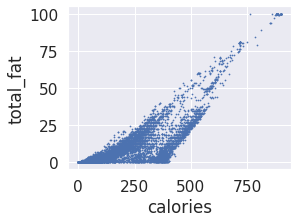

In [509]:
visualize('calories', 'total_fat')

**Calories and cholesterol**

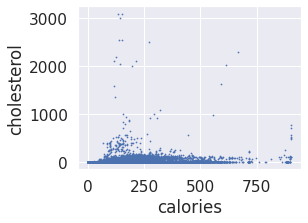

In [510]:
visualize('calories', 'cholesterol')

**Calories and carbohydrate**

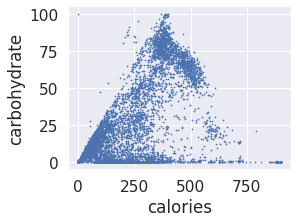

In [511]:
visualize('calories', 'carbohydrate')

**Heatmap for all the features of this task**

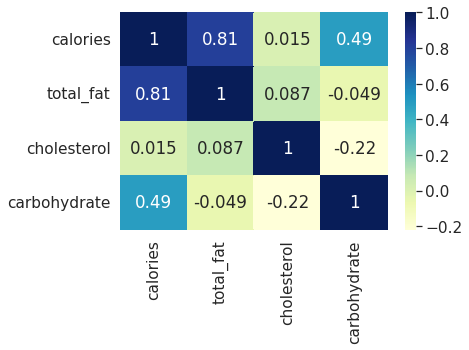

In [512]:
sns.heatmap(data_t1.corr(), annot=True, cmap="YlGnBu")

# Task 2

**Identify and analyze which foods are good for people with ulcer**

In [513]:
data.head()

,index,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,lucopene,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,iron,magnesium,manganese,phosphorous,potassium,selenium,zinc,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,hydroxyproline,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100.0,381,0.1,0.0,0.0,9.0,0.4,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.000,0.0,0.0,0.00,0.00,0.0,2.0,0.050,0.47,3.0,0.053,13.0,3.0,2.8,0.06,0.26,0.019,0.012,0.020,0.006,0.053,0.009,0.008,0.0,0.010,0.036,0.006,0.006,0.013,0.024,0.012,0.009,0.001,0.010,0.014,91.27,0.9,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32
1,1,"Nuts, pecans",100.0,691,72.0,6.2,0.0,0.0,40.5,22.0,0.0,1.167,0.863,0.130,0.660,56.0,3.0,0.0,29.0,9.0,17.0,0,0.00,0.210,1.1,0.0,1.40,1.40,3.5,70.0,1.200,2.53,121.0,4.500,277.0,410.0,3.8,4.53,9.17,0.397,1.177,0.929,0.152,1.829,0.453,0.262,0.0,0.336,0.598,0.287,0.183,0.426,0.363,0.474,0.306,0.093,0.215,0.411,13.86,9.6,3.97,0.04,0.0,0.04,0.0,0.00,3.90,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
2,2,"Eggplant, raw",100.0,25,0.2,0.0,0.0,2.0,6.9,22.0,0.0,0.649,0.281,0.037,0.039,23.0,1.0,0.0,14.0,0.0,36.0,0,0.00,0.084,2.2,0.0,0.30,0.30,3.5,9.0,0.081,0.23,14.0,0.232,24.0,229.0,0.3,0.16,0.98,0.051,0.057,0.164,0.006,0.186,0.041,0.023,0.0,0.045,0.064,0.047,0.011,0.043,0.043,0.042,0.037,0.009,0.027,0.053,5.88,3.0,3.53,1.54,0.0,1.58,0.0,0.00,0.26,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30
3,3,"Teff, uncooked",100.0,367,2.4,0.4,0.0,12.0,13.1,0.0,0.0,3.363,0.942,0.270,0.390,9.0,0.0,0.0,5.0,0.0,66.0,0,0.00,0.482,0.0,0.0,0.08,0.08,1.9,180.0,0.810,7.63,184.0,9.240,429.0,427.0,4.4,3.63,13.30,0.747,0.517,0.820,0.236,3.349,0.477,0.301,0.0,0.501,1.068,0.376,0.428,0.698,0.664,0.622,0.510,0.139,0.458,0.686,73.13,8.0,1.84,0.47,0.0,0.73,0.0,0.01,0.62,2.38,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82
4,4,"Sherbet, orange",100.0,144,2.0,1.2,1.0,46.0,7.7,4.0,0.0,0.063,0.224,0.097,0.027,46.0,12.0,0.0,1.0,5.0,7.0,0,0.13,0.023,2.3,0.0,0.01,0.01,0.0,54.0,0.028,0.14,8.0,0.011,40.0,96.0,1.5,0.48,1.10,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,30.40,1.3,24.32,0.00,0.0,0.00,0.0,0.00,0.00,2.00,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10


In majority of ulcer cases , the cause of ulcers can be linked to a bacterial infection known as a *Helicobacter pylori (H. pylori)* as well as the chronic use of over-the-counter nonsteroidal anti-inflammatory drugs, such as aspirin and ibuprofen.

According to [The Ultimate Food List For Ulcer Patients Care: What Foods To Eat And Avoid](https://biophytopharm.com/food-list-for-ulcer-patients/) and [Stomach Ulcer Diet](https://www.healthline.com/health/stomach-ulcer-diet), these food are needed to help fight ulcer: figs, boiled eggs, strawberries, bananas, cauliflower, cabbage, carrots, blackberries, apples, spinach, young green peas, green salad, zucchini, bread, pudding, radishes, blueberries, raspberries, cherries, bell peppers, broccoli, kale, yogurt, kefir, miso, sauerkraut, kombucha, honey, garlic, licorice, and turmeric.

According to [What to Eat When You Have an Ulcer](https://www.verywellhealth.com/what-can-i-eat-if-i-have-a-peptic-ulcer-1742154), low-fat protein foods are great food for ulcer patients. 

All of these suggests to eat food with antimicrobial, anti-iflammatory, and antioxidant properties.

Avoid alcohol, fatty meats and proteins, spicy food, caffeinated drinks, salty foods, and high cholesterol food.



## Selecting the said food above

In [514]:
def select(food):
  return data[data['name'].str.contains(food)]

In [515]:
def combine(food_list):
  food_list_2 = []

  for a in food_list:
    food_list_2.append(a)

  for b in food_list:
    food_list_2.append(b.title())

  food_dict = {}
  
  for i in range(len(food_list_2)):
    food_dict.update({food_list_2[i]:select(food_list_2[i])})

  return pd.concat(food_dict.values())

In [516]:
#figs
figs = ['figs']
figs_ = combine(figs)
#egg
egg = ['egg', 'eggs']
egg_ = combine(egg)
#strawberry
strawberry = ['strawberry', 'strawberries']
strawberry_ = combine(strawberry)
#banana
banana = ['banana', 'bananas']
banana_ = combine(banana)
#cauliflower
caulifower = ['cauliflower', 'cauliflowers']
cauliflower_ = combine(figs)
#cabbage
cabbage = ['cabbage', 'cabbages']
cabbage_ = combine(cabbage)
#carrot
carrot = ['carrot', 'carrots']
carrot_ = combine(carrot)
#blackberry
blackberry = ['blackberry', 'blackberries']
blackberry_ = combine(blackberry)
#apple
apple = ['apple', 'apples']
apple_ = combine(apple)
#spinach
spinach = ['spinach']
spinach_ = combine(spinach)
#pea
pea = ['pea', 'peas']
pea_ = combine(pea)
#salad
salad = ['salad', 'salads']
salad_ = combine(salad)
#zucchini
zucchini = ['zucchini', 'zucchinis']
zucchini_ = combine(zucchini)
#bread
bread = ['bread', 'breads']
bread_ = combine(bread)
#pudding
pudding = ['pudding', 'puddings']
pudding_ = combine(pudding)
#radish
radish = ['radish', 'radishes']
radish_ = combine(radish)
#blueberry
blueberry = ['blueberry', 'blueberries']
blueberry_ = combine(blueberry)
#raspberry
raspberry = ['raspberry', 'raspberries']
raspberry_ = combine(raspberry)
#cherry
cherry = ['cherry', 'cherry']
cherry_ = combine(cherry)
#bell pepper
bell_pepper = ['bell pepper', 'bell peppers', 'Bell pepper', 'Bell peppers']
bell_pepper_ = combine(bell_pepper)
#broccoli
broccoli = ['broccoli', 'broccolis']
broccoli_ = combine(broccoli)
#kale
kale = ['kale', 'kales']
kale_ = combine(kale)
#yogurt
yogurt = ['yogurt']
yogurt_ = combine(yogurt)
#kefir
kefir = ['kefir']
kefir_ = combine(kefir)
#miso
miso = ['miso']
miso_ = combine(miso)
#sauerkraut
sauerkraut = ['sauerkraut']
sauerkraut_ = combine(sauerkraut)
#kombucha
kombucha = ['kombucha']
kombucha_ = combine(kombucha)
#honey
honey = ['honey']
honey_ = combine(honey)
#garlic
garlic = ['garlic']
garlic_ = combine(garlic)
#licorice
licorice = ['licorice']
licorice_ = combine(licorice)
#turmeric
turmeric = ['turmeric']
turmeric_ = combine(turmeric)

## Grouping foods

**FRUITS:**
Figs, strawberry, banana, apple, blueberry, raspberry, cherry, salad

**VEGETABLES:**
Cauliflower, cabbage, carrot, spinach, pea, salad, zucchini, radish, bell pepper, broccoli, kale

**GREENS:**
Cauliflower, cabbage, spinach, pea, broccoli, kale, licorice, zucchini

**LEAFY GREENS:**
Cabbage, spinach, broccoli

**CONDIMENTS:** 
Egg, honey

**VEGETABLE SALAD INGREDIENTS:**
Egg, garlic, cabbage, carrot, bell pepper, spinach, radish

**FRUIT SALAD INGREDIENTS:**
strawberry, banana, apple, blueberry, raspberry, cherry

**DAIRY:**
Yogurt, kefir

**FERMENTED:**
Kefir, miso, sauerkraut, kombucha, 

**FOR MEDICATION:**
Turmeric, licorice

**WHEAT:**
Bread, pudding

**BERRIES:**
Blueberry, raspberry,strawberry

**SPICES:**
Garlic, turmeric

In [517]:
FRUITS = pd.concat([figs_, strawberry_, banana_, apple_, blueberry_, raspberry_, cherry_, salad_])
VEGETABLES = pd.concat([cauliflower_, cabbage_, carrot_, spinach_, pea_, salad_, zucchini_, radish_, bell_pepper_, broccoli_, kale_])
GREENS = pd.concat([cauliflower_, cabbage_, spinach_, pea_, broccoli_, kale_, licorice_, zucchini_])
LEAFY_GREENS = pd.concat([cabbage_, spinach_, broccoli_])
CONDIMENTS = pd.concat([egg_, honey_])
VEGETABLE_SALAD_INGREDIENTS = pd.concat([egg_, garlic_, cabbage_, carrot_, bell_pepper_, spinach_, radish_])
FRUIT_SALAD_INGREDIENTS = pd.concat([strawberry_, banana_, apple_, blueberry_, raspberry_, cherry_])
DAIRY = pd.concat([yogurt_, kefir_])
FERMENTED = pd.concat([kefir_, miso_, sauerkraut_, kombucha_])
FOR_MEDICATION = pd.concat([turmeric_, licorice_])
WHEAT = pd.concat([bread_, pudding_])
BERRIES = pd.concat([blueberry_, raspberry_, strawberry_])
SPICES = pd.concat([garlic_, turmeric_])

**Removing duplicates on each group**

In [518]:
groups = [FRUITS, VEGETABLES, GREENS, LEAFY_GREENS, CONDIMENTS, VEGETABLE_SALAD_INGREDIENTS, FRUIT_SALAD_INGREDIENTS, DAIRY, FERMENTED, FOR_MEDICATION, WHEAT, BERRIES, SPICES]
for i in groups:
  print(f'Duplicates in : {i.duplicated().sum()}')

Duplicates in : 127
Duplicates in : 117
Duplicates in : 75
Duplicates in : 0
Duplicates in : 8
Duplicates in : 38
Duplicates in : 119
Duplicates in : 0
Duplicates in : 0
Duplicates in : 0
Duplicates in : 61
Duplicates in : 4
Duplicates in : 0


In [519]:
FRUITS = FRUITS.drop_duplicates()
VEGETABLES = VEGETABLES.drop_duplicates()
GREENS = GREENS.drop_duplicates()
LEAFY_GREENS = LEAFY_GREENS.drop_duplicates()
CONDIMENTS = CONDIMENTS.drop_duplicates()
VEGETABLE_SALAD_INGREDIENTS = VEGETABLE_SALAD_INGREDIENTS.drop_duplicates()
FRUIT_SALAD_INGREDIENTS = FRUIT_SALAD_INGREDIENTS.drop_duplicates()
DAIRY = DAIRY.drop_duplicates()
FERMENTED = FERMENTED.drop_duplicates()
FOR_MEDICATION = FOR_MEDICATION .drop_duplicates()
WHEAT = WHEAT.drop_duplicates()
BERRIES = BERRIES.drop_duplicates()
SPICES = SPICES.drop_duplicates()

In [520]:
groups = [FRUITS, VEGETABLES, GREENS, LEAFY_GREENS, CONDIMENTS, VEGETABLE_SALAD_INGREDIENTS, FRUIT_SALAD_INGREDIENTS, DAIRY, FERMENTED, FOR_MEDICATION, WHEAT, BERRIES, SPICES]
for i in groups:
  print(f'Duplicates in : {i.duplicated().sum()}')

Duplicates in : 0
Duplicates in : 0
Duplicates in : 0
Duplicates in : 0
Duplicates in : 0
Duplicates in : 0
Duplicates in : 0
Duplicates in : 0
Duplicates in : 0
Duplicates in : 0
Duplicates in : 0
Duplicates in : 0
Duplicates in : 0


## Reducing columns

**Dropping serving size and lucopene to all groups. Also index.**

In [521]:
FRUITS = FRUITS.drop(['index', 'serving_size', 'lucopene'], axis = 1)
VEGETABLES = VEGETABLES.drop(['index', 'serving_size', 'lucopene'], axis = 1)
GREENS = GREENS.drop(['index', 'serving_size', 'lucopene'], axis = 1)
LEAFY_GREENS = LEAFY_GREENS.drop(['index', 'serving_size', 'lucopene'], axis = 1)
CONDIMENTS = CONDIMENTS.drop(['index', 'serving_size', 'lucopene'], axis = 1)
VEGETABLE_SALAD_INGREDIENTS = VEGETABLE_SALAD_INGREDIENTS.drop(['index', 'serving_size', 'lucopene'], axis = 1)
FRUIT_SALAD_INGREDIENTS = FRUIT_SALAD_INGREDIENTS.drop(['index', 'serving_size', 'lucopene'], axis = 1)
DAIRY = DAIRY.drop(['index', 'serving_size', 'lucopene'], axis = 1)
FERMENTED = FERMENTED.drop(['index', 'serving_size', 'lucopene'], axis = 1)
FOR_MEDICATION = FOR_MEDICATION .drop(['index', 'serving_size', 'lucopene'], axis = 1)
WHEAT = WHEAT.drop(['index', 'serving_size', 'lucopene'], axis = 1)
BERRIES = BERRIES.drop(['index', 'serving_size', 'lucopene'], axis = 1)
SPICES = SPICES.drop(['index', 'serving_size', 'lucopene'], axis = 1)

In [522]:
FRUITS.head()

,name,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,iron,magnesium,manganese,phosphorous,potassium,selenium,zinc,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,hydroxyproline,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
77,"Figs, uncooked, dried",249,0.9,0.1,0.0,10.0,15.8,9.0,0.0,0.619,0.434,0.082,0.085,10.0,0.0,0.0,6.0,0.0,32.0,0.0,0.106,1.2,0.0,0.35,0.35,15.6,162.0,0.287,2.03,68.0,0.510,67.0,680.0,0.6,0.55,3.30,0.134,0.077,0.645,0.036,0.295,0.108,0.037,0.0,0.089,0.128,0.088,0.034,0.076,0.610,0.128,0.085,0.020,0.041,0.122,63.87,9.8,47.92,22.93,0.13,24.79,0.0,0.0,0.07,0.93,0.144,0.159,0.345,0.0,0.0,1.86,0.0,0.0,30.05
230,"Figs, stewed, dried",107,0.4,0.1,0.0,4.0,6.8,1.0,0.0,0.640,0.127,0.110,0.011,4.0,0.0,0.0,3.0,0.0,14.0,0.0,0.133,4.4,0.0,0.15,0.15,6.7,70.0,0.124,0.88,29.0,0.220,29.0,294.0,0.2,0.24,1.42,0.058,0.033,0.279,0.016,0.127,0.047,0.016,0.0,0.038,0.055,0.038,0.015,0.033,0.263,0.055,0.037,0.009,0.018,0.053,27.57,4.2,23.35,0.00,0.00,0.00,0.0,0.0,0.00,0.40,0.062,0.068,0.149,0.0,0.0,0.80,0.0,0.0,69.80
661,"Figs, raw",74,0.3,0.1,0.0,1.0,4.7,6.0,0.0,0.400,0.300,0.050,0.060,142.0,7.0,0.0,85.0,0.0,9.0,0.0,0.113,2.0,0.0,0.11,0.11,4.7,35.0,0.070,0.37,17.0,0.128,14.0,232.0,0.2,0.15,0.75,0.045,0.017,0.176,0.012,0.072,0.025,0.011,0.0,0.023,0.033,0.030,0.006,0.018,0.049,0.037,0.024,0.006,0.032,0.028,19.18,2.9,16.26,0.00,0.00,0.00,0.0,0.0,0.00,0.30,0.060,0.066,0.144,0.0,0.0,0.66,0.0,0.0,79.11
2782,"Figs, solids and liquids, water pack, canned",53,0.1,0.0,0.0,1.0,3.3,2.0,0.0,0.445,0.069,0.038,0.023,38.0,2.0,0.0,23.0,0.0,7.0,0.0,0.070,1.0,0.0,0.08,0.08,3.3,28.0,0.110,0.29,10.0,0.088,10.0,103.0,0.1,0.12,0.40,0.024,0.009,0.094,0.007,0.039,0.014,0.006,0.0,0.012,0.017,0.016,0.003,0.010,0.026,0.020,0.013,0.003,0.017,0.015,13.99,2.2,11.79,0.00,0.00,0.00,0.0,0.0,0.00,0.10,0.020,0.022,0.048,0.0,0.0,0.30,0.0,0.0,85.21
4085,"Figs, solids and liquids, heavy syrup pack, ca...",88,0.1,0.0,0.0,1.0,5.3,2.0,0.0,0.428,0.069,0.037,0.022,37.0,2.0,0.0,22.0,0.0,11.0,0.0,0.070,1.0,0.0,0.12,0.12,5.3,27.0,0.106,0.28,10.0,0.084,10.0,99.0,0.2,0.11,0.38,0.023,0.009,0.090,0.006,0.037,0.013,0.005,0.0,0.012,0.017,0.015,0.003,0.009,0.025,0.019,0.012,0.003,0.016,0.014,22.90,2.2,20.70,0.00,0.00,0.00,0.0,0.0,0.00,0.10,0.020,0.022,0.048,0.0,0.0,0.29,0.0,0.0,76.33


### Inspecting FRUITS

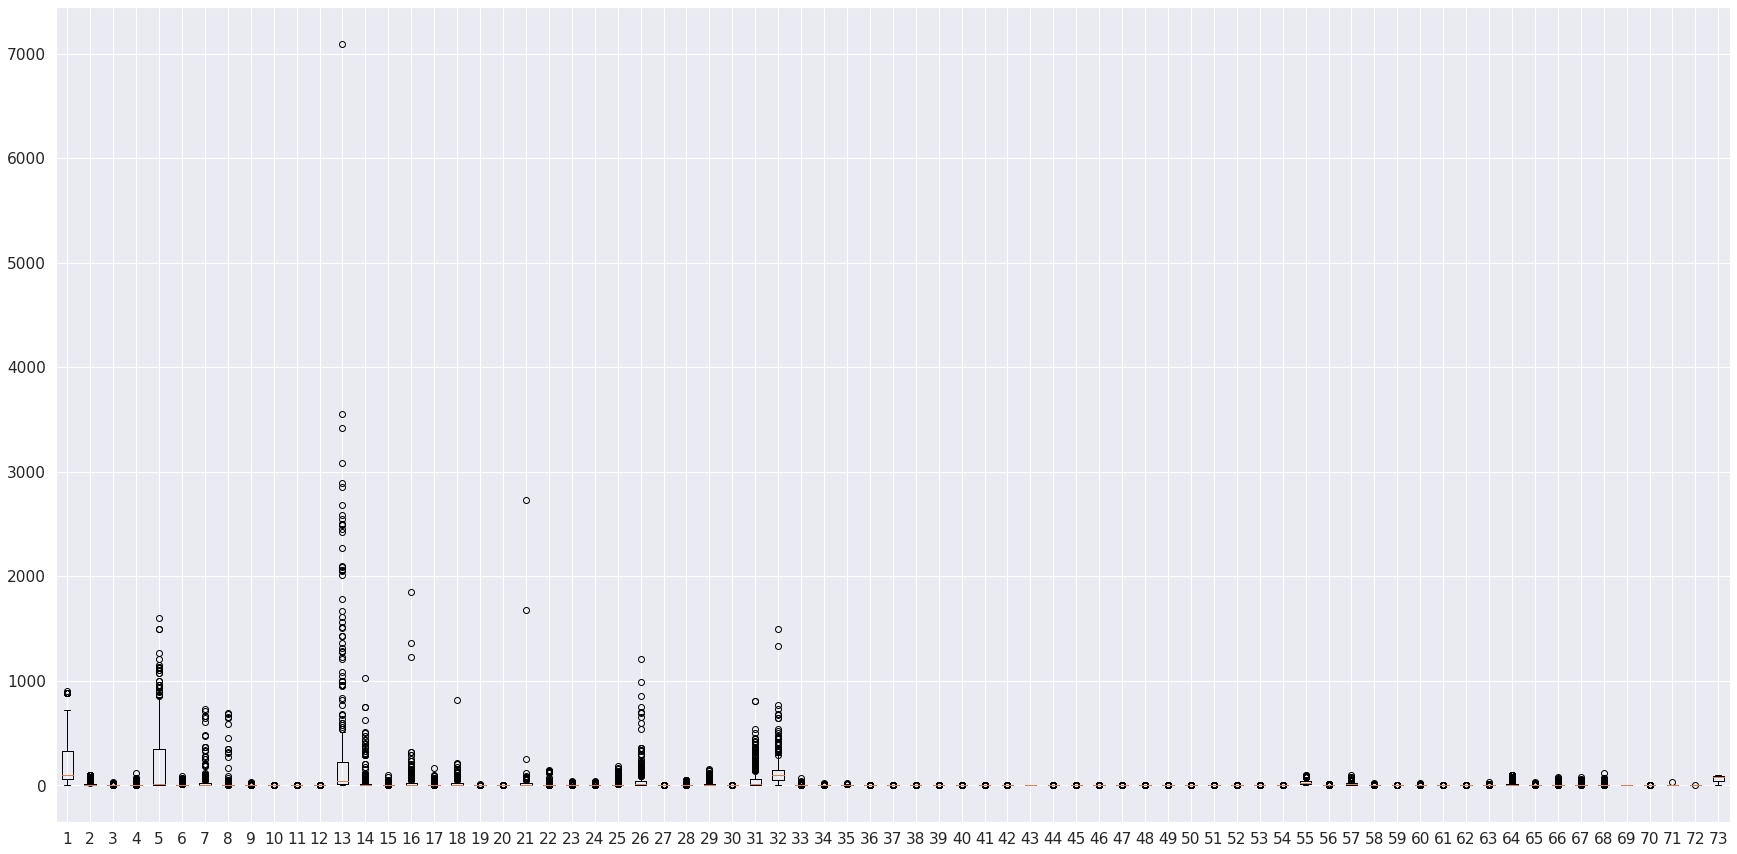

In [523]:
def boxplot(dataset):
  plt.figure(figsize=(30, 15))
  plt.boxplot([dataset[dataset.columns[i]] for i in range(1, len(dataset.columns))])
  plt.show()

boxplot(FRUITS)

The graph above shows only number on the x-axis but it really represents what nutrient it is. So the dictionary below will match the number to its corresponding nutrient. For example, '1' goes to 'calories' and '2' goes to 'total_fat'. This will make picking a nutrient based on numbers easier for the future.

In [524]:
def food_dict(dataset):
  dict_ = {}
  for i in range(1, len(dataset.columns)):
    dict_.update({i:dataset.columns[i]})
  return dict_

FRUITS_dict = food_dict(FRUITS)

The following numbers will be picked because it is seen that those nutrients are abundant in that food group: 1, 5, and 13.

In [525]:
def food_picked(dataset_dict, num_list):

  print('Abundant nutrients in FRUITS:')
  for i in num_list:
    print(dataset_dict[i])

FRUITS_num = [1, 5, 13, 32]
food_picked(FRUITS_dict, FRUITS_num)

Abundant nutrients in FRUITS:
calories
sodium
vitamin_a
potassium


From the above code, the following functions are made: <br>
1. boxplot(dataset) - shows a boxplot of a dataset
2. food_dict(dataset) - returns a dictionary where a number represents a nutrient from the dataset
3. food_picked(dataset_dict) - shows the abundant nutrients in a food group

Now, will try on the other food groups.

### Inspecting VEGETABLES

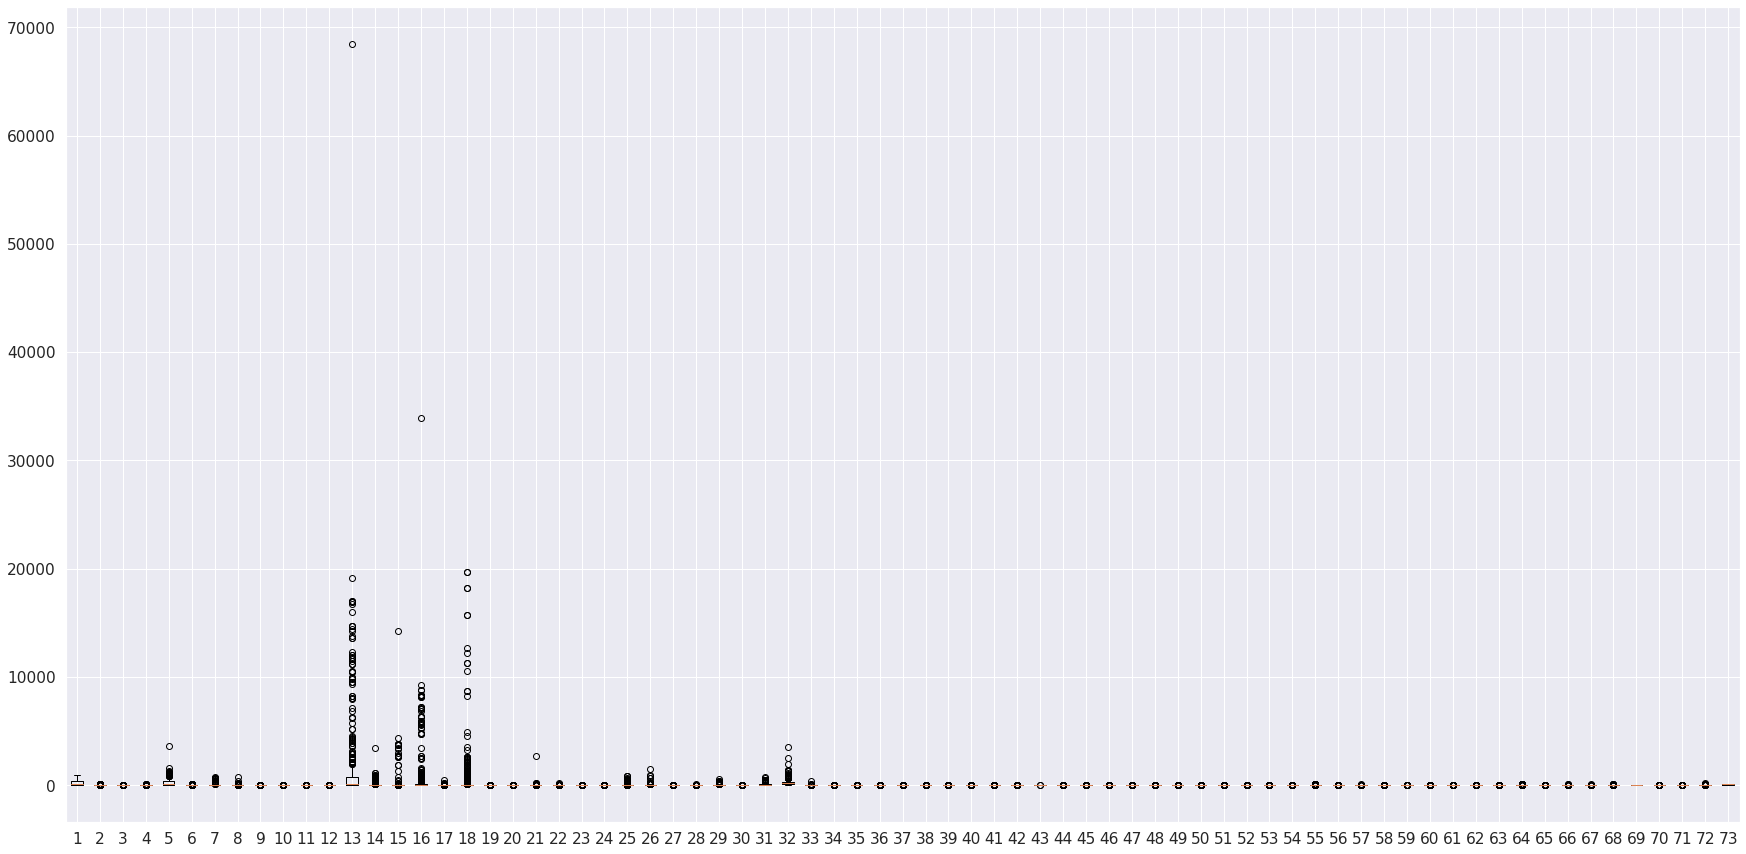

In [526]:
boxplot(VEGETABLES)
VEGETABLES_dict = food_dict(VEGETABLES)

In VEGETABLES group, 13 was picked.

In [527]:
VEGETABLES_num = [13]
food_picked(VEGETABLES_dict, VEGETABLES_num)

Abundant nutrients in FRUITS:
vitamin_a


### Inspecting GREENS

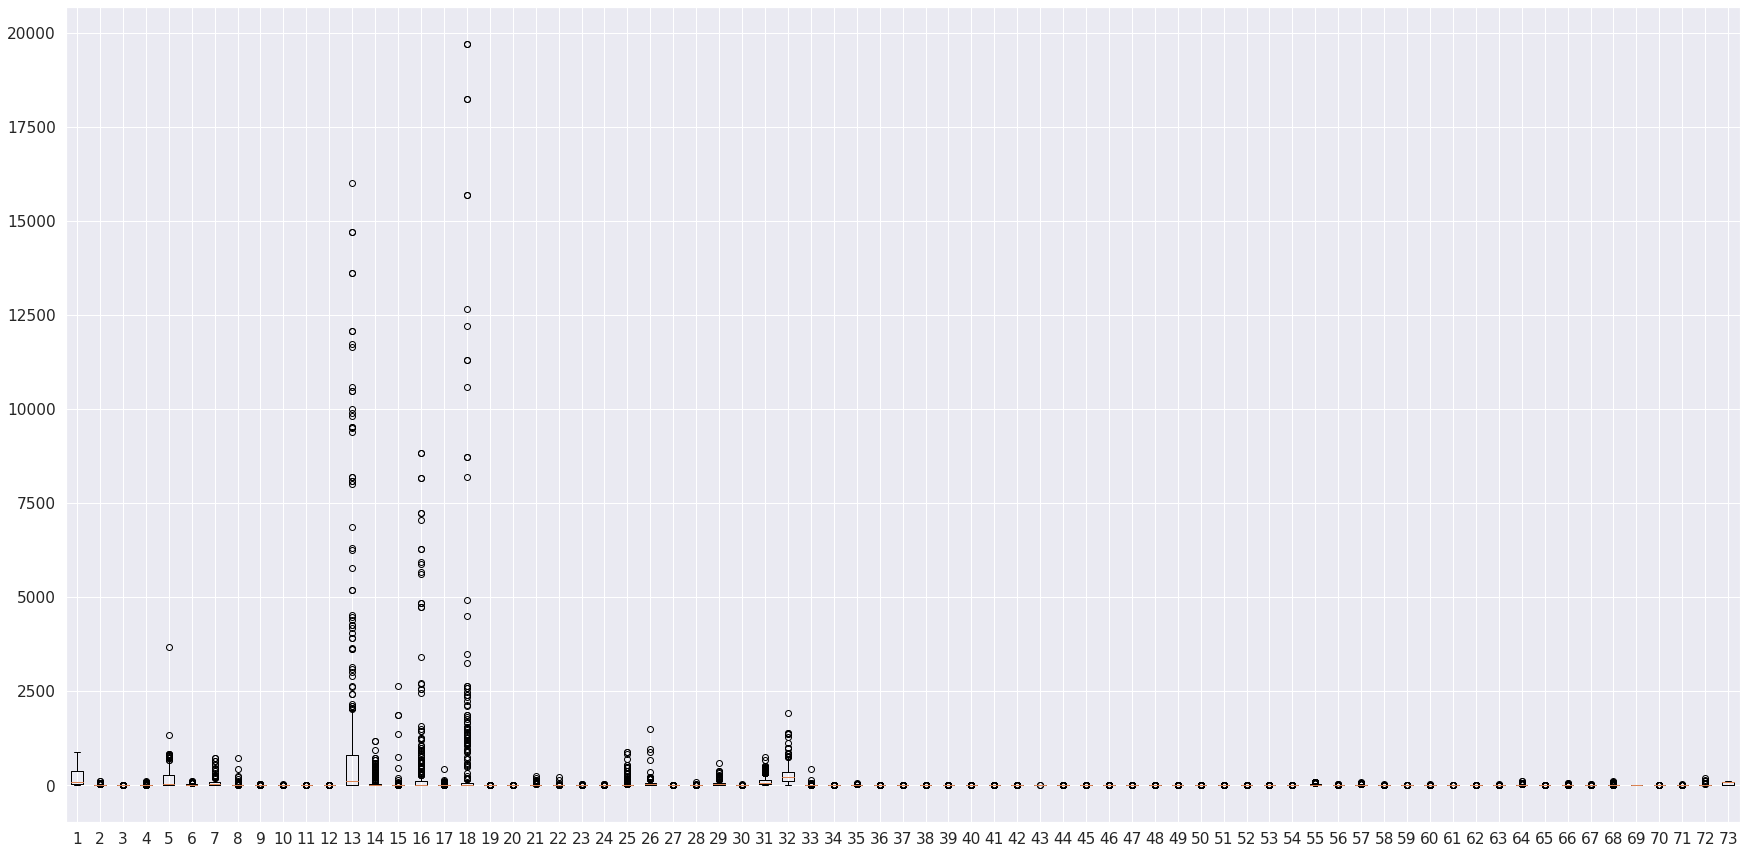

In [528]:
boxplot(GREENS)
GREENS_dict = food_dict(GREENS)

In GREENS group, the picked numbers are 1, 5, 13, and 32

In [529]:
GREENS_num = [1, 5, 13, 32]
food_picked(GREENS_dict, GREENS_num)

Abundant nutrients in FRUITS:
calories
sodium
vitamin_a
potassium


### Inspecting LEAFY_GREENS

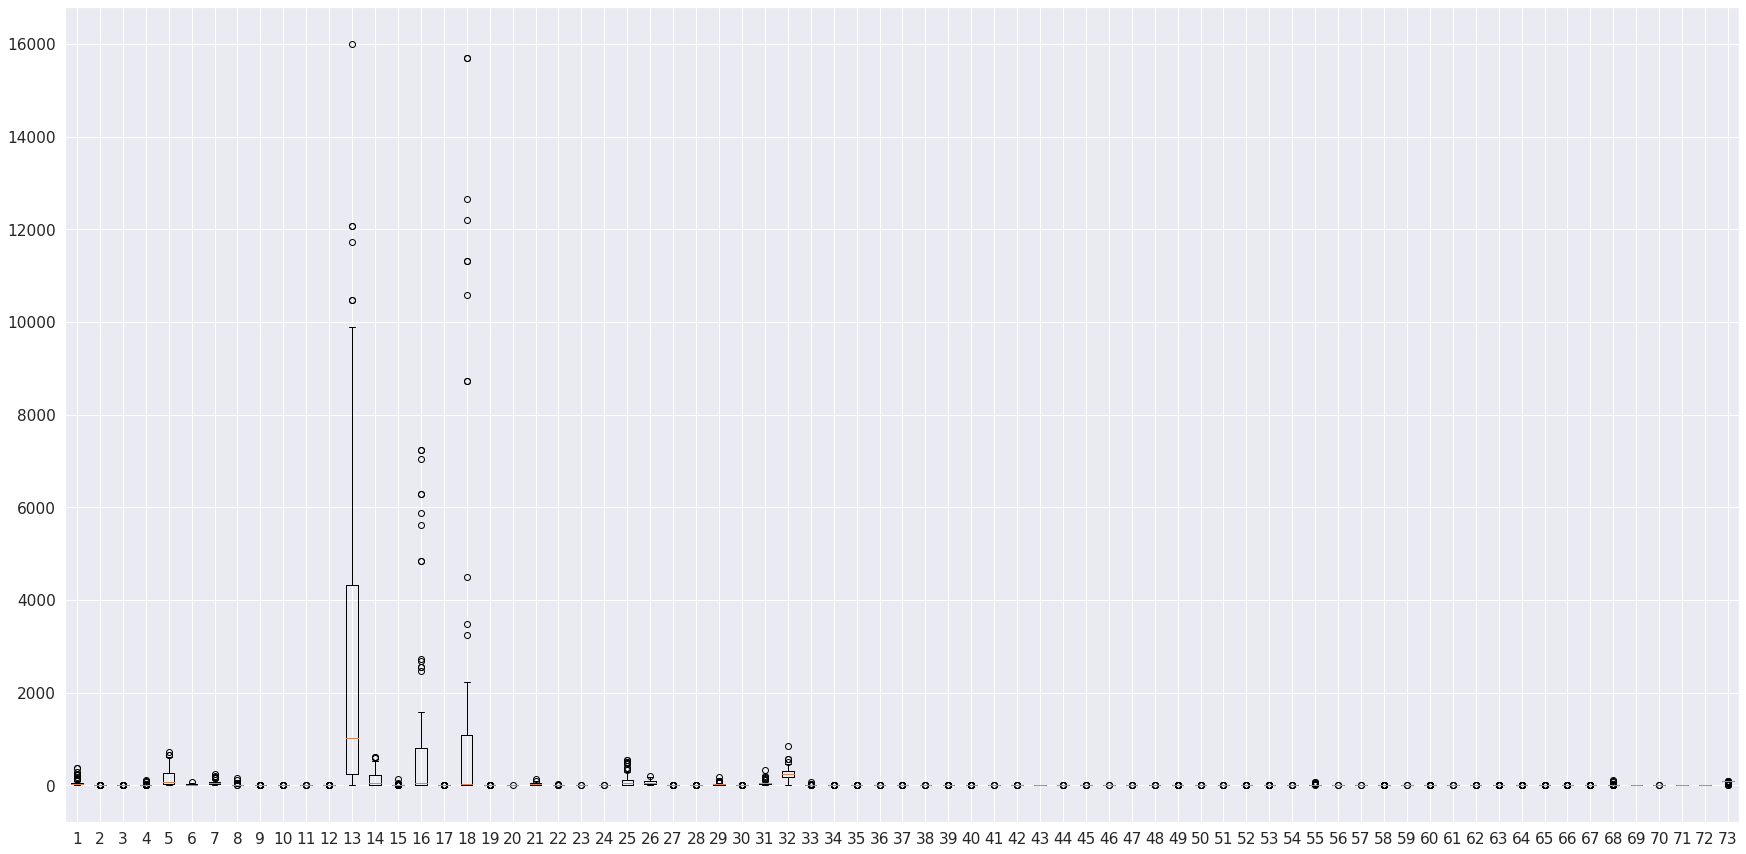

In [530]:
boxplot(LEAFY_GREENS)
LEAFY_GREENS_dict = food_dict(LEAFY_GREENS)

In this food group, 5, 13, 16, 18, and 32.

In [531]:
LEAFY_GREENS_num = [5, 13, 16, 18, 32]
food_picked(LEAFY_GREENS_dict, LEAFY_GREENS_num)

Abundant nutrients in FRUITS:
sodium
vitamin_a
carotene_beta
lutein_zeaxanthin
potassium


### Inspecting CONDIMENTS

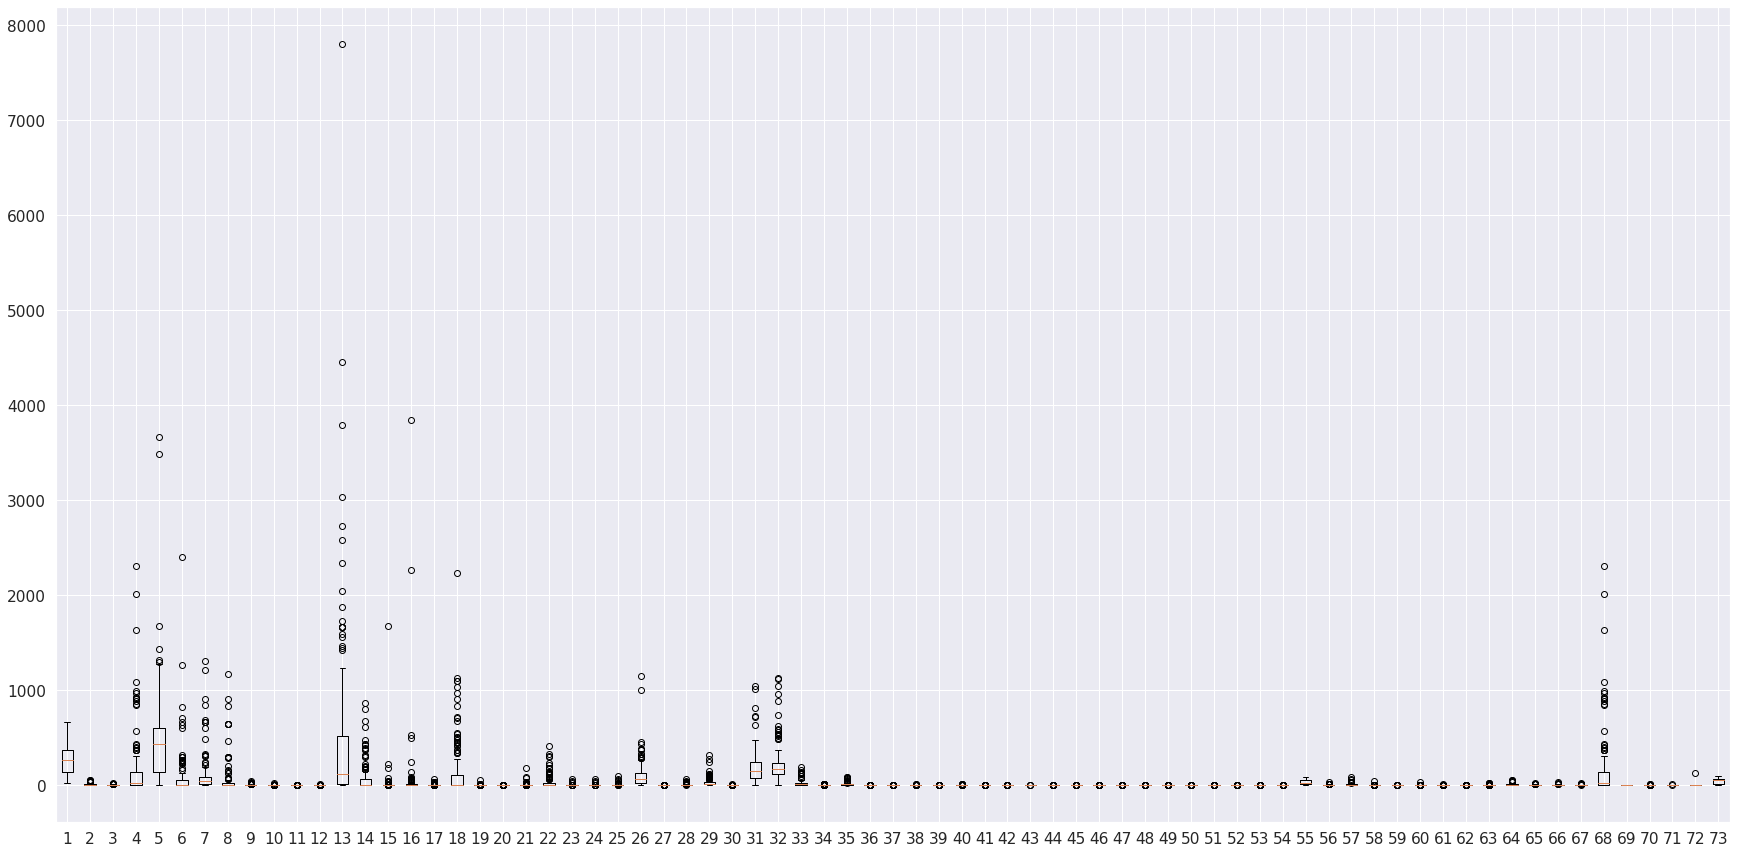

In [532]:
boxplot(CONDIMENTS)
CONDIMENTS_dict = food_dict(CONDIMENTS)

In [533]:
CONDIMENTS_num = [1, 4, 5, 6, 7, 13, 14, 18, 26, 31, 32, 68, 73]
food_picked(CONDIMENTS_dict, CONDIMENTS_num)

Abundant nutrients in FRUITS:
calories
cholesterol
sodium
choline
folate
vitamin_a
vitamin_a_rae
lutein_zeaxanthin
calcium
phosphorous
potassium
fatty_acids_total_trans
water


### Inspecting VEGETABLE_SALAD_INGREDIENTS

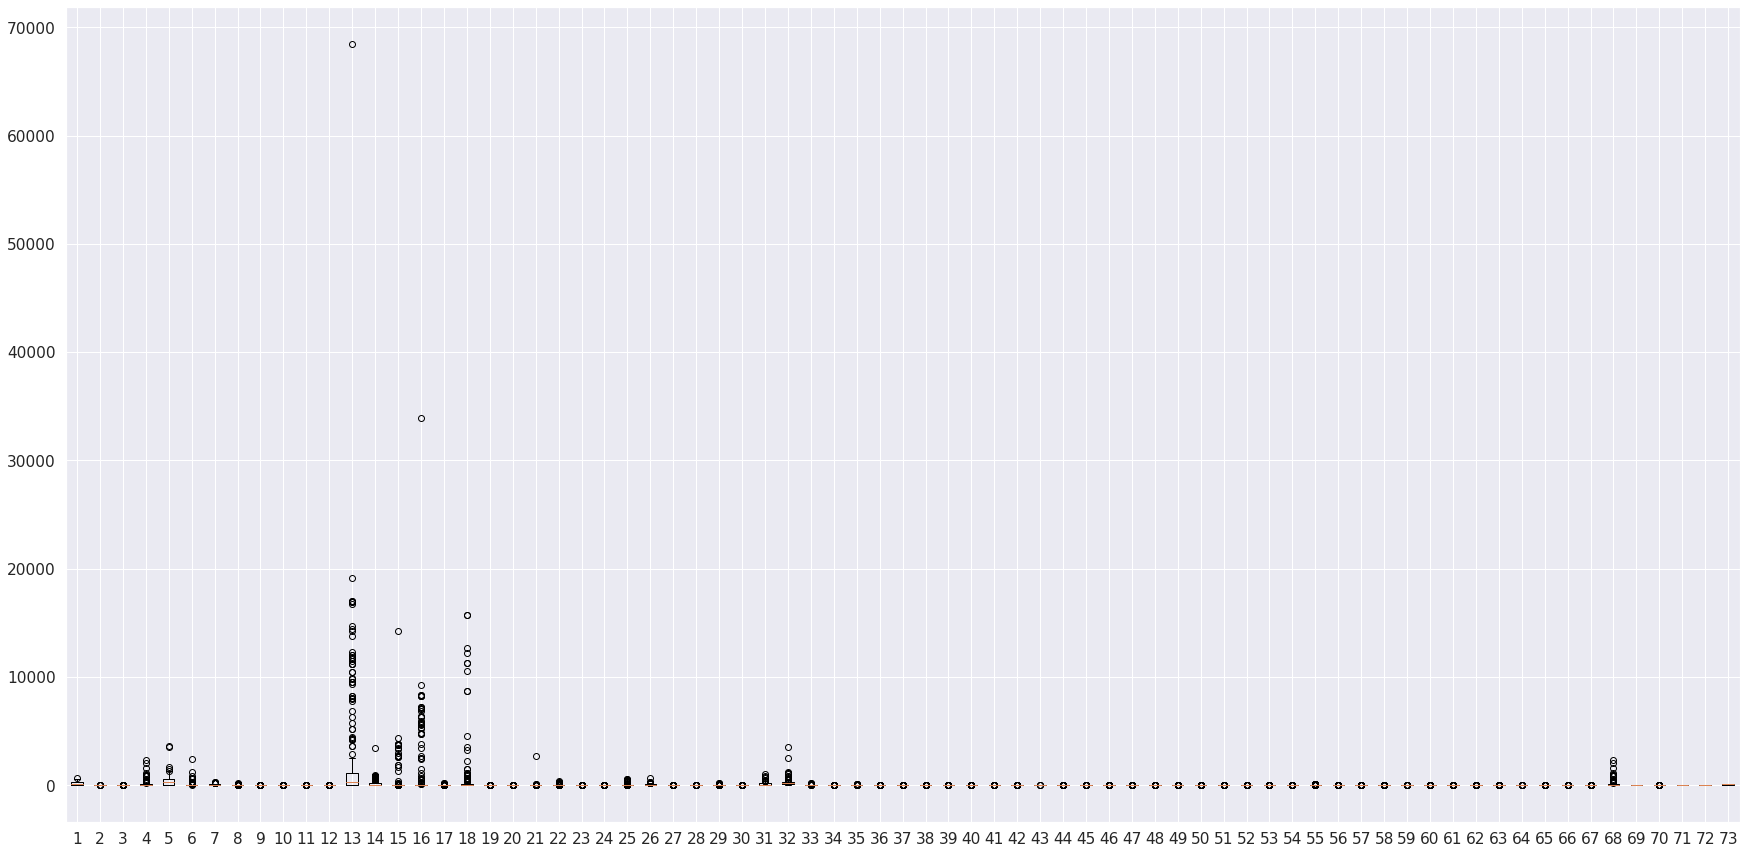

In [534]:
boxplot(VEGETABLE_SALAD_INGREDIENTS)
VEGETABLE_SALAD_INGREDIENTS_dict = food_dict(VEGETABLE_SALAD_INGREDIENTS)

In [535]:
VEGETABLE_SALAD_INGREDIENTS_num = [5, 13]
food_picked(VEGETABLE_SALAD_INGREDIENTS_dict, VEGETABLE_SALAD_INGREDIENTS_num)

Abundant nutrients in FRUITS:
sodium
vitamin_a


### Inspecting FRUIT_SALAD_INGREDIENTS

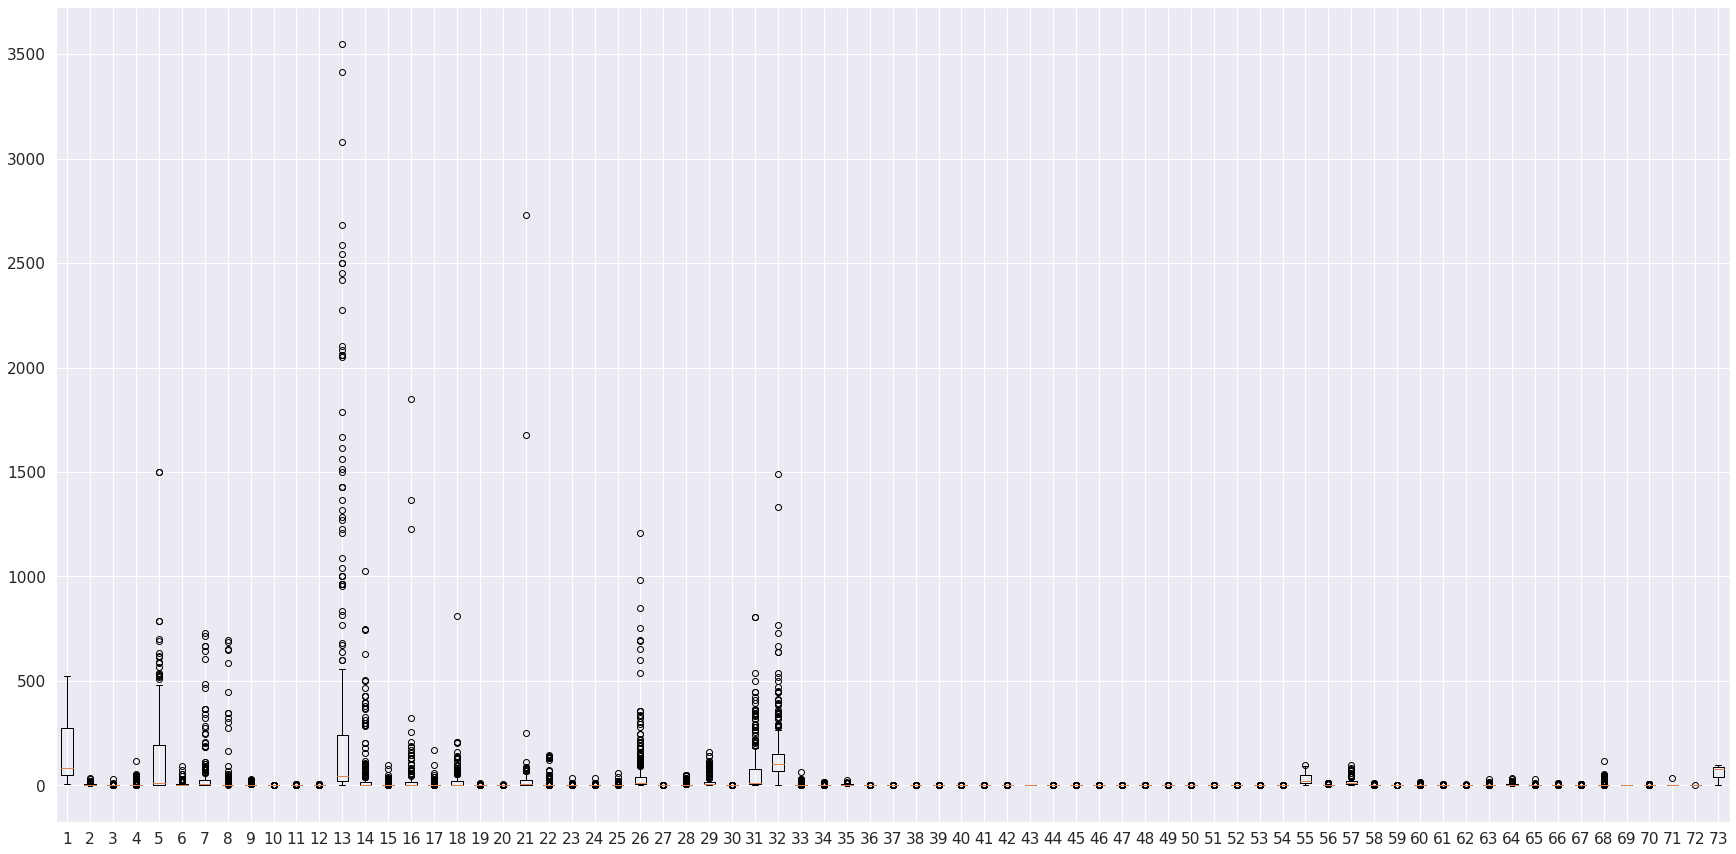

In [536]:
boxplot(FRUIT_SALAD_INGREDIENTS)
FRUIT_SALAD_INGREDIENTS_dict = food_dict(FRUIT_SALAD_INGREDIENTS)

In [537]:
FRUIT_SALAD_INGREDIENTS_num = [1, 5, 13, 26, 31, 32, 55, 73]
food_picked(FRUIT_SALAD_INGREDIENTS_dict, FRUIT_SALAD_INGREDIENTS_num)

Abundant nutrients in FRUITS:
calories
sodium
vitamin_a
calcium
phosphorous
potassium
carbohydrate
water


### Inspecting DAIRY

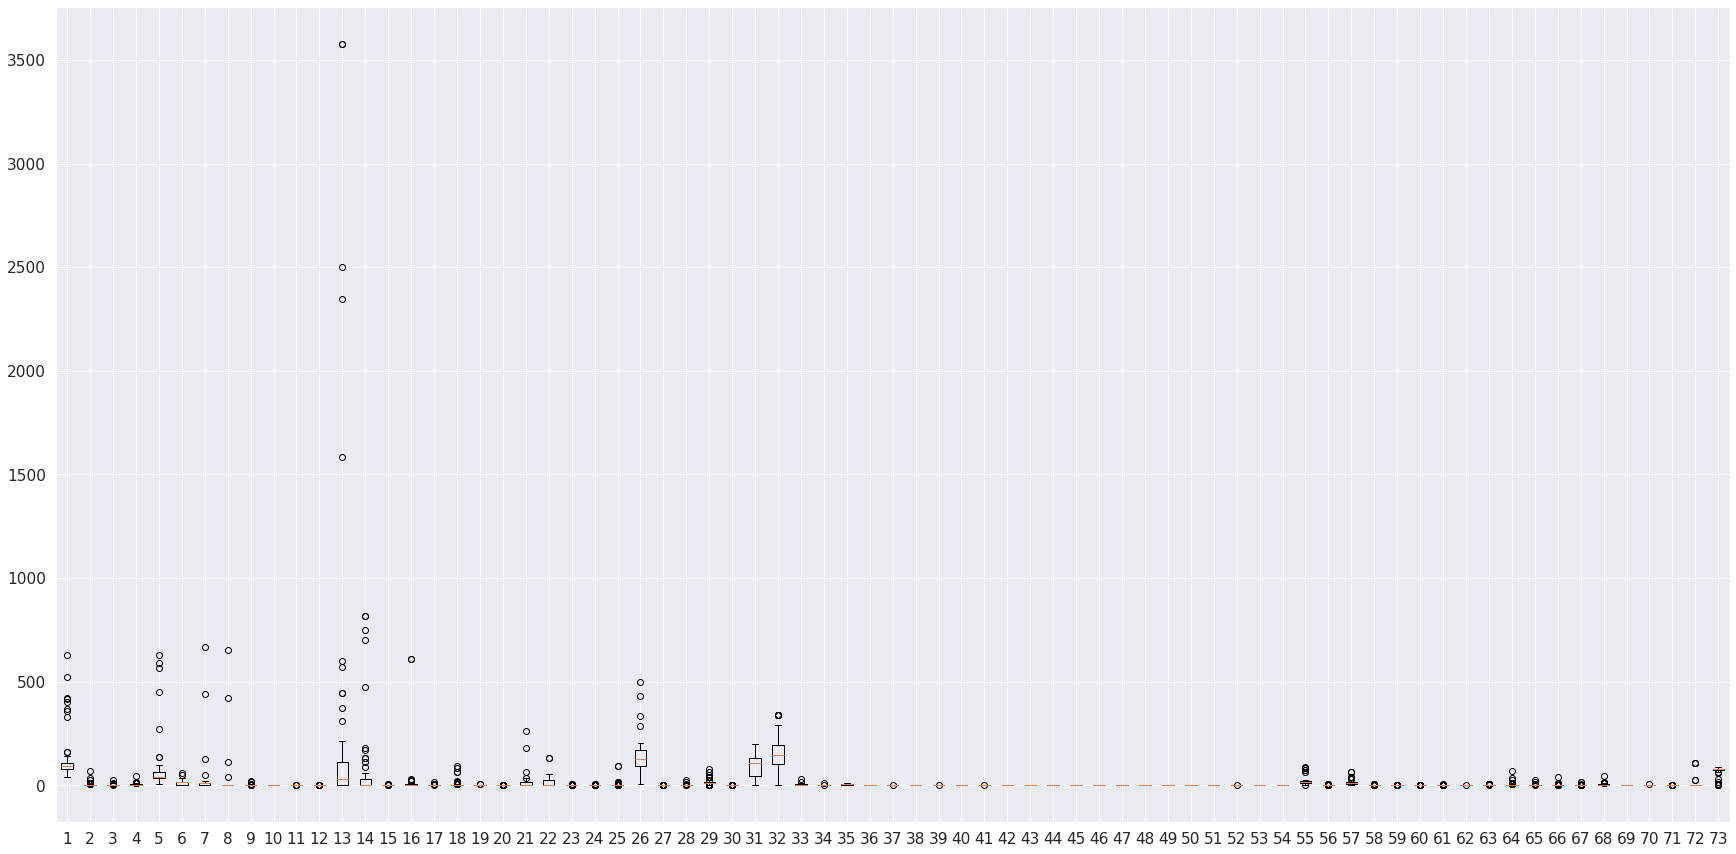

In [538]:
boxplot(DAIRY)
DAIRY_dict = food_dict(DAIRY)

In [539]:
DAIRY_num = [1, 5, 13, 14, 21, 22, 26, 31, 32]
food_picked(DAIRY_dict, DAIRY_num)

Abundant nutrients in FRUITS:
calories
sodium
vitamin_a
vitamin_a_rae
vitamin_c
vitamin_d
calcium
phosphorous
potassium


### Inspecting FERMENTED

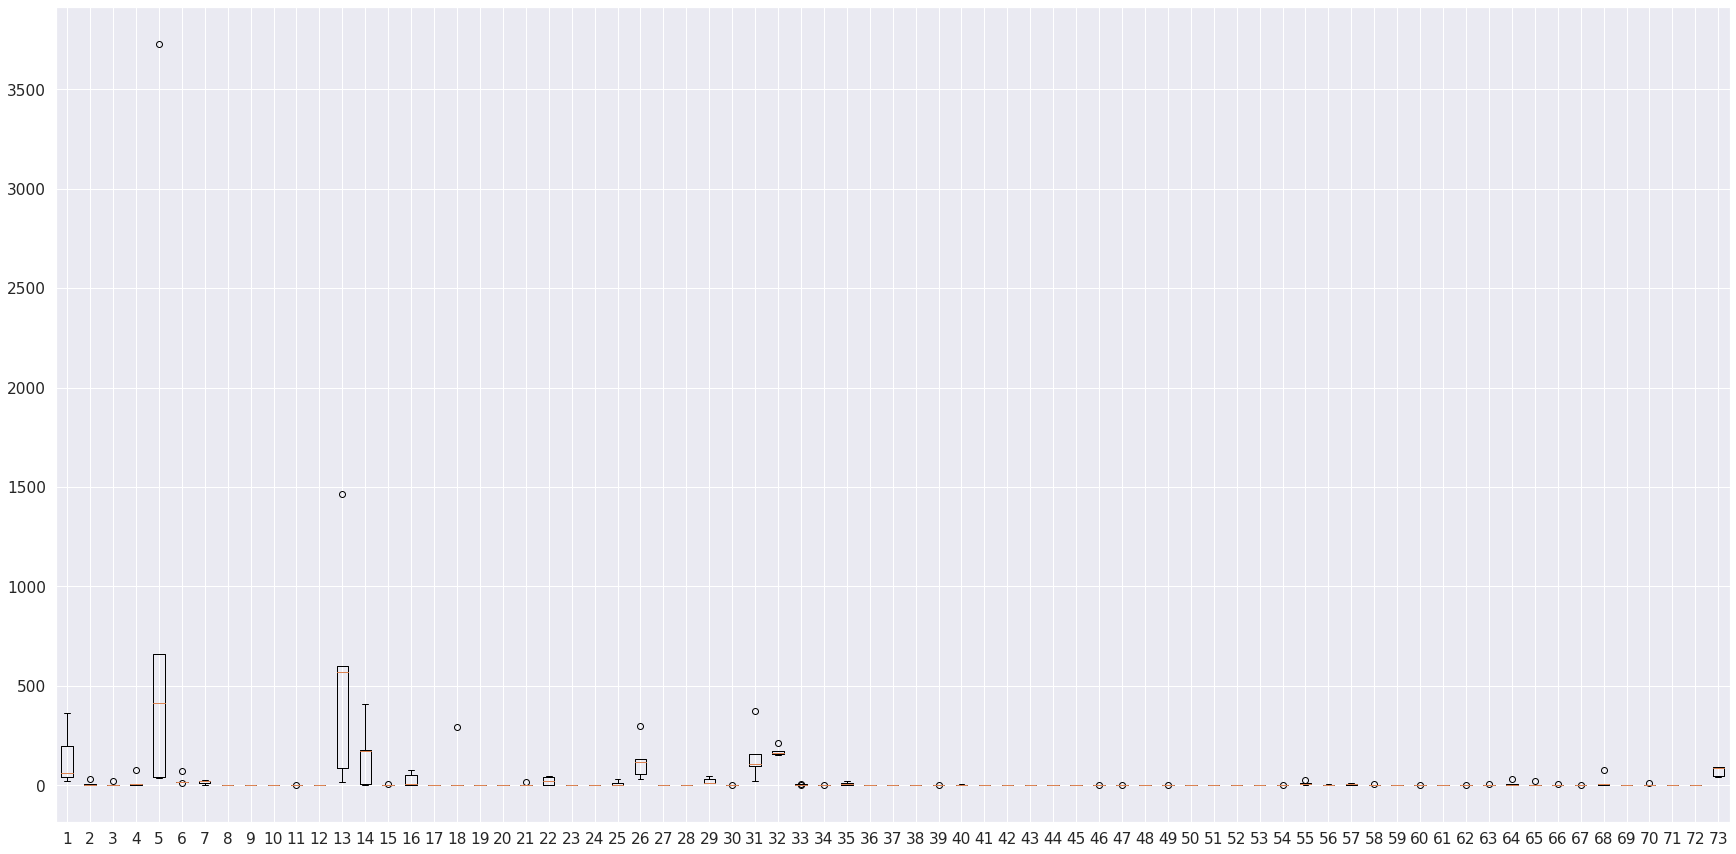

In [540]:
boxplot(FERMENTED)
FERMENTED_dict = food_dict(FERMENTED)

In [541]:
FERMENTED_num = [1, 5, 13, 14, 16, 22, 26, 31, 73]
food_picked(FERMENTED_dict, FERMENTED_num)

Abundant nutrients in FRUITS:
calories
sodium
vitamin_a
vitamin_a_rae
carotene_beta
vitamin_d
calcium
phosphorous
water


### Inspecting FOR_MEDICATION

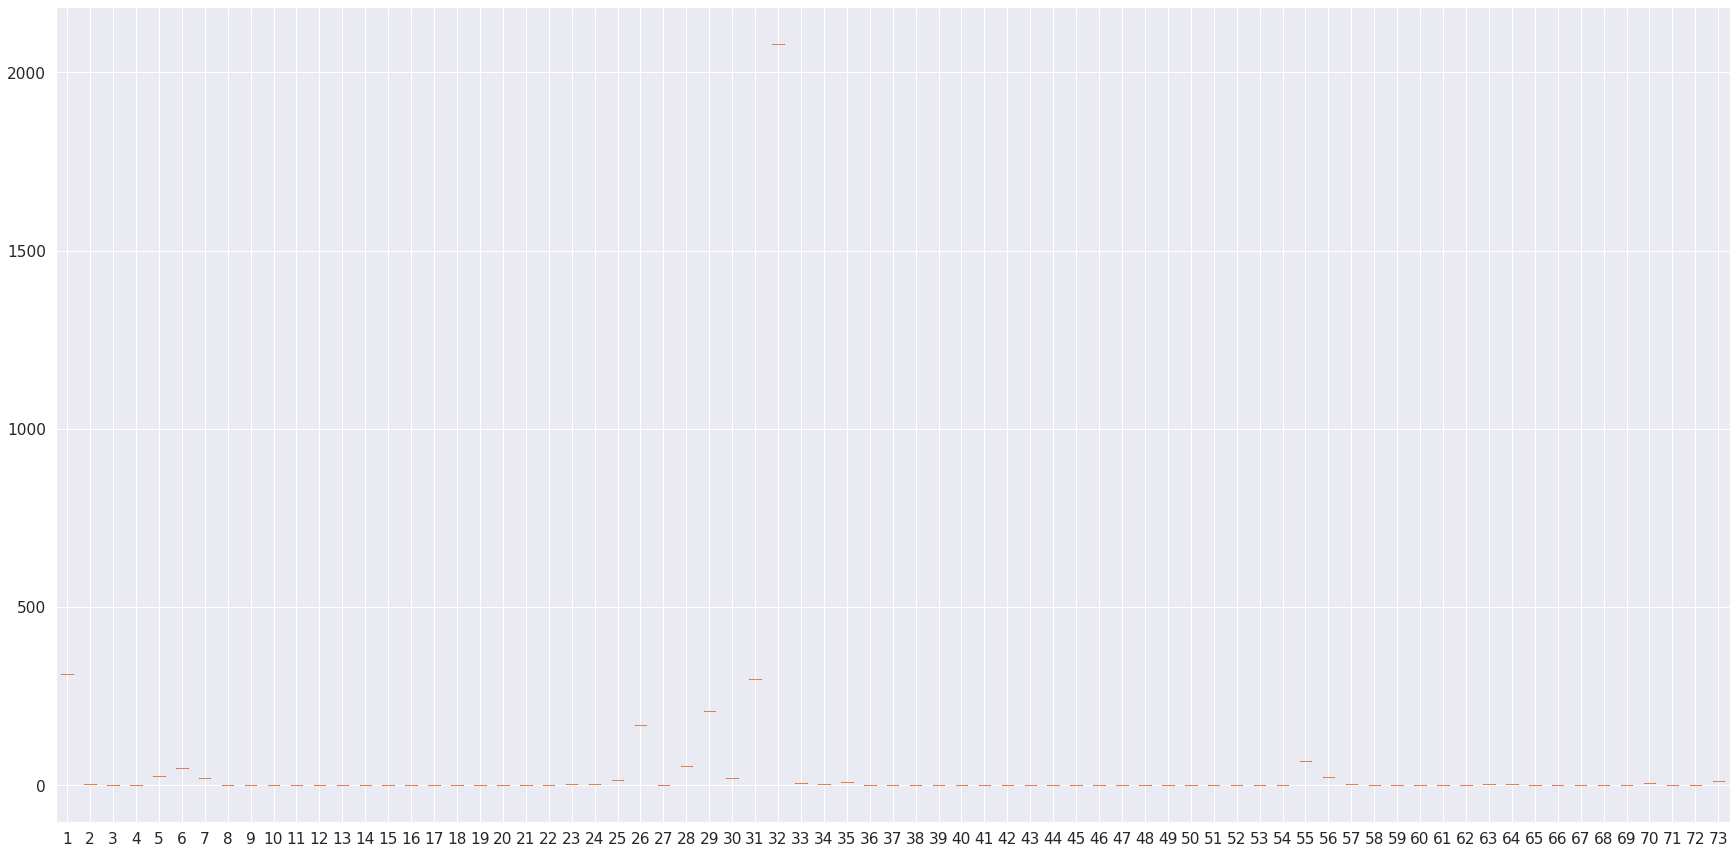

In [542]:
boxplot(FOR_MEDICATION)
FOR_MEDICATION_dict = food_dict(FOR_MEDICATION)

Since there is no distinguishable feature here, I will choose the ones that are elevated.

In [543]:
FOR_MEDICATION_num = [1, 5, 6, 7, 25, 26, 28, 29, 30, 31, 55, 56, 70, 73]
food_picked(FOR_MEDICATION_dict, FOR_MEDICATION_num)

Abundant nutrients in FRUITS:
calories
sodium
choline
folate
vitamin_k
calcium
iron
magnesium
manganese
phosphorous
carbohydrate
fiber
ash
water


### Inspecting WHEAT

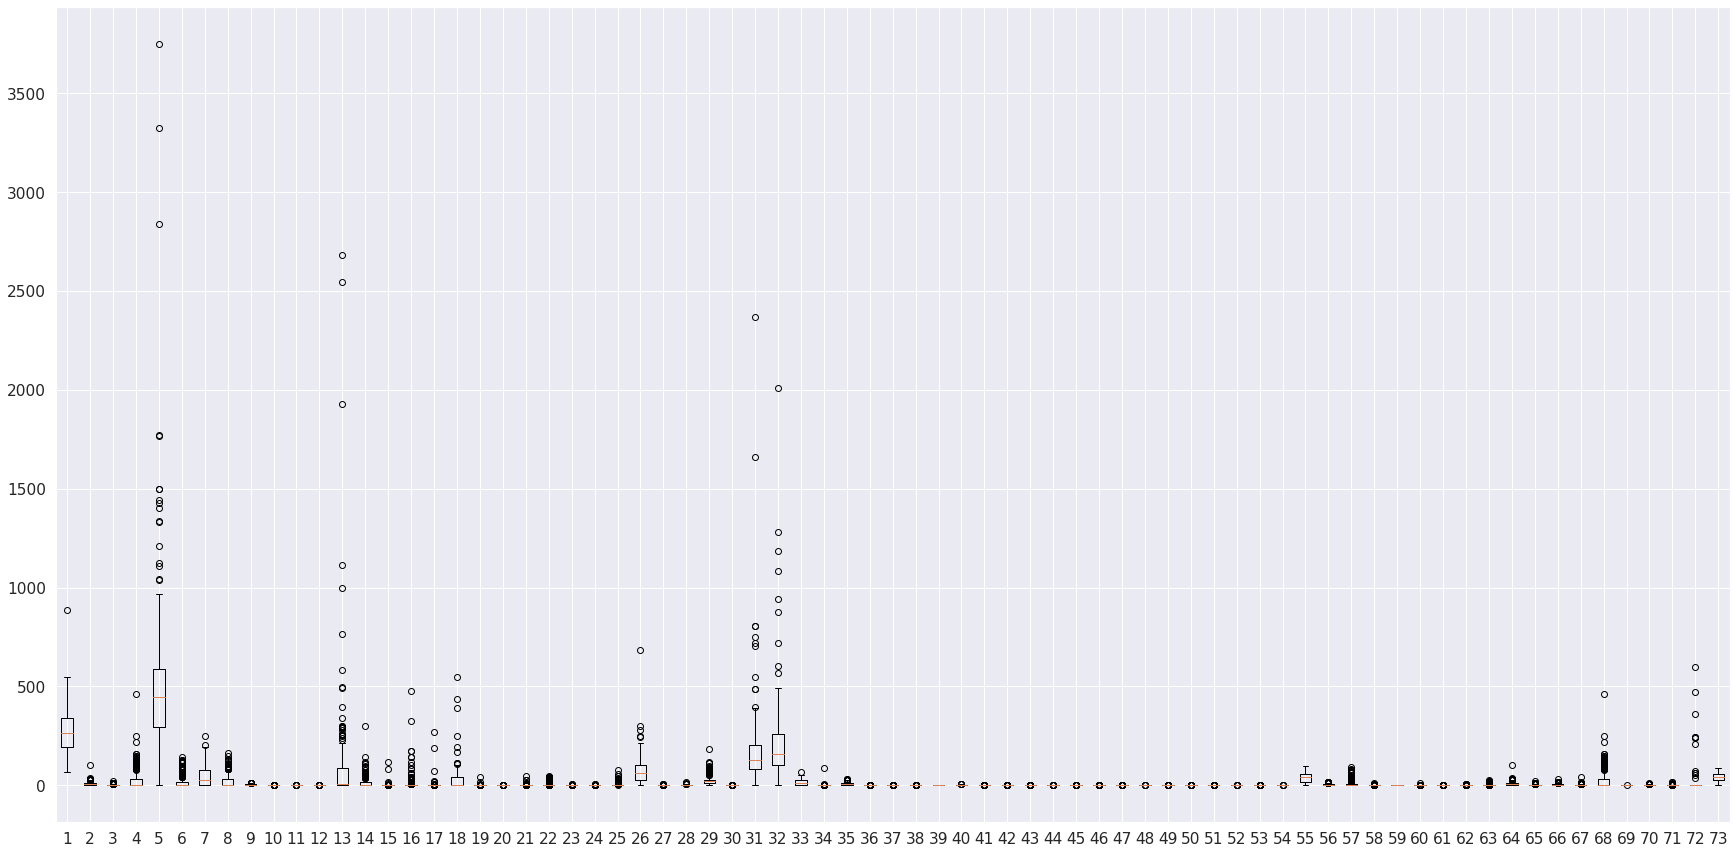

In [544]:
boxplot(WHEAT)
WHEAT_dict = food_dict(WHEAT)

In [545]:
WHEAT_num = [1, 4, 5, 7, 8, 13, 18, 26, 31, 32, 33, 55, 68, 73]
food_picked(WHEAT_dict, WHEAT_num)

Abundant nutrients in FRUITS:
calories
cholesterol
sodium
folate
folic_acid
vitamin_a
lutein_zeaxanthin
calcium
phosphorous
potassium
selenium
carbohydrate
fatty_acids_total_trans
water


### Inspecting BERRIES

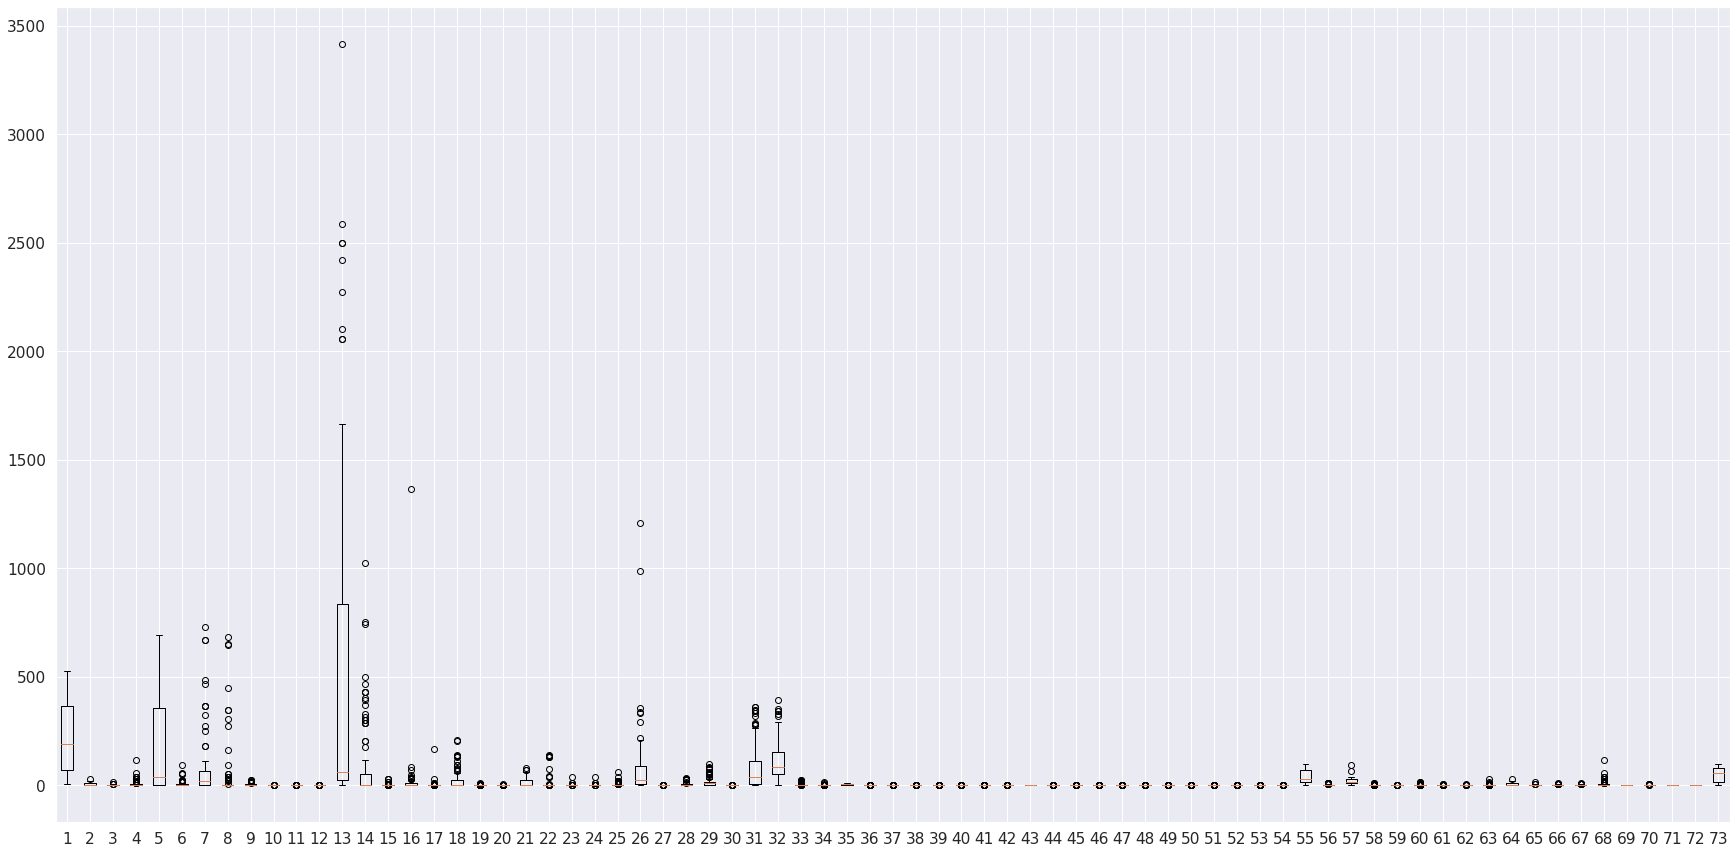

In [546]:
boxplot(BERRIES)
BERRIES_dict = food_dict(BERRIES)

In [547]:
BERRIES_num = [1, 5, 6, 13, 14, 18, 21, 26, 31, 32, 55, 73]
food_picked(BERRIES_dict, BERRIES_num)

Abundant nutrients in FRUITS:
calories
sodium
choline
vitamin_a
vitamin_a_rae
lutein_zeaxanthin
vitamin_c
calcium
phosphorous
potassium
carbohydrate
water


### Inspecting SPICES

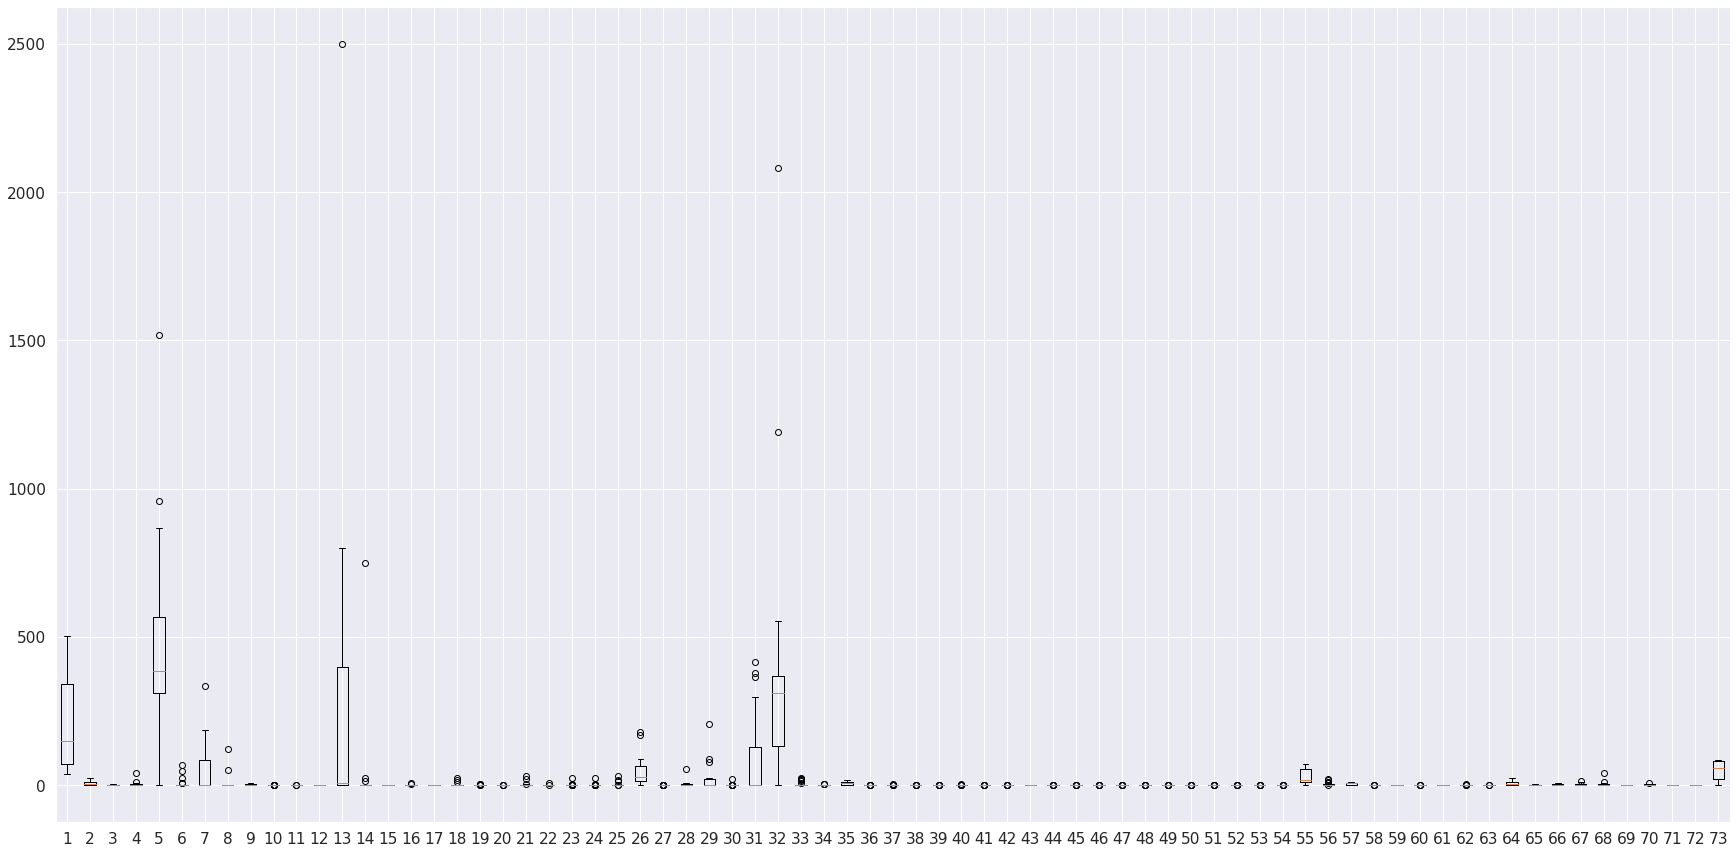

In [548]:
boxplot(SPICES)
SPICES_dict = food_dict(SPICES)

In [549]:
SPICES_num = [1, 5, 7, 13, 26, 31, 32, 55, 73]
food_picked(SPICES_dict, SPICES_num)

Abundant nutrients in FRUITS:
calories
sodium
folate
vitamin_a
calcium
phosphorous
potassium
carbohydrate
water


## Identifying most common nutrients

In [550]:
all_nutrients = [FRUITS_num, VEGETABLES_num, GREENS_num, LEAFY_GREENS_num, CONDIMENTS_num, VEGETABLE_SALAD_INGREDIENTS_num, FRUIT_SALAD_INGREDIENTS_num, DAIRY_num, FERMENTED_num, FOR_MEDICATION_num, WHEAT_num, BERRIES_num, SPICES_num]
lst_nutrients = []
for i in all_nutrients:
  lst_nutrients += i

print(lst_nutrients)

[1, 5, 13, 32, 13, 1, 5, 13, 32, 5, 13, 16, 18, 32, 1, 4, 5, 6, 7, 13, 14, 18, 26, 31, 32, 68, 73, 5, 13, 1, 5, 13, 26, 31, 32, 55, 73, 1, 5, 13, 14, 21, 22, 26, 31, 32, 1, 5, 13, 14, 16, 22, 26, 31, 73, 1, 5, 6, 7, 25, 26, 28, 29, 30, 31, 55, 56, 70, 73, 1, 4, 5, 7, 8, 13, 18, 26, 31, 32, 33, 55, 68, 73, 1, 5, 6, 13, 14, 18, 21, 26, 31, 32, 55, 73, 1, 5, 7, 13, 26, 31, 32, 55, 73]


In [551]:
print(FRUITS_dict)

{1: 'calories', 2: 'total_fat', 3: 'saturated_fat', 4: 'cholesterol', 5: 'sodium', 6: 'choline', 7: 'folate', 8: 'folic_acid', 9: 'niacin', 10: 'pantothenic_acid', 11: 'riboflavin', 12: 'thiamin', 13: 'vitamin_a', 14: 'vitamin_a_rae', 15: 'carotene_alpha', 16: 'carotene_beta', 17: 'cryptoxanthin_beta', 18: 'lutein_zeaxanthin', 19: 'vitamin_b12', 20: 'vitamin_b6', 21: 'vitamin_c', 22: 'vitamin_d', 23: 'vitamin_e', 24: 'tocopherol_alpha', 25: 'vitamin_k', 26: 'calcium', 27: 'copper', 28: 'iron', 29: 'magnesium', 30: 'manganese', 31: 'phosphorous', 32: 'potassium', 33: 'selenium', 34: 'zinc', 35: 'protein', 36: 'alanine', 37: 'arginine', 38: 'aspartic_acid', 39: 'cystine', 40: 'glutamic_acid', 41: 'glycine', 42: 'histidine', 43: 'hydroxyproline', 44: 'isoleucine', 45: 'leucine', 46: 'lysine', 47: 'methionine', 48: 'phenylalanine', 49: 'proline', 50: 'serine', 51: 'threonine', 52: 'tryptophan', 53: 'tyrosine', 54: 'valine', 55: 'carbohydrate', 56: 'fiber', 57: 'sugars', 58: 'fructose', 59:

In [552]:
for i in range(len(lst_nutrients)):
  lst_nutrients[i] = FRUITS_dict[lst_nutrients[i]]

In [555]:
nutrient_name = []
nutrient_count = []

for i in lst_nutrients:
  if i not in nutrient_name:
    nutrient_name.append(i)
    nutrient_count.append(lst_nutrients.count(i))

for j in range(len(nutrient_name)):
  print(f'{nutrient_name[j]}: {nutrient_count[j]}')

calories: 10
sodium: 12
vitamin_a: 12
potassium: 9
carotene_beta: 2
lutein_zeaxanthin: 4
cholesterol: 2
choline: 3
folate: 4
vitamin_a_rae: 4
calcium: 8
phosphorous: 8
fatty_acids_total_trans: 2
water: 7
carbohydrate: 5
vitamin_c: 2
vitamin_d: 2
vitamin_k: 1
iron: 1
magnesium: 1
manganese: 1
fiber: 1
ash: 1
folic_acid: 1
selenium: 1


By looking at the number of nutrients that appeared above, the most common are: <br>
1. vitamin_a (12)
2. sodium (12)
3. calories (10)
4. potassium (9)
5. calcium (8)
6. phosphorous (8)
7. water (7)

The food in this dataset contains mostly the nutrients said above, which is good for ulcer.